In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','pastis','full-pastis-RGB')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



# Red Wavelet

In [3]:
red_wv = convert_to_wavelet_basis(data_dir, "red", debug=True, image_opener = npz_opener)
red_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:06<00:00, 250.24it/s]


channel  layer  frequency orientation  \
0     red      1   0.124514          L1   
1     red      2   0.142301           D   
2     red      2   0.142301           H   
3     red      2   0.142301           V   
4     red      3   0.166018           D   

                                                data  
0  [-32.27976631949251, 46.440997662328755, -18.5...  
1  [-20.02488559799009, 2.700709911684015, 18.920...  
2  [-53.73542356328656, -75.62084103407787, 10.26...  
3  [51.26434946880484, 11.401177447362475, -26.74...  
4  [33.58142803730303, 3.2386679449900893, -7.689...

In [4]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 9):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_89178/1668664979.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.020126   9.043595e-01
1     2     D      V  0.076101   1.992333e-04
0     2     D      H  0.084906   2.082593e-05
2     3     H      V  0.012107   7.398067e-01
1     3     D      V  0.077830   3.579411e-17
0     3     D      H  0.080031   3.909023e-18
2     4     H      V  0.008255   3.494906e-01
1     4     D      V  0.073192   1.054744e-59
0     4     D      H  0.079206   7.394247e-70
2     5     H      V  0.002074   9.806424e-01
1     5     D      V  0.082164  3.026443e-299
0     5     D      H  0.082518  7.912407e-302
2     6     H      V  0.005321   1.966850e-05
1     6     D      V  0.082707   0.000000e+00
0     6     D      H  0.085311   0.000000e+00
2     7     H      V  0.006226   7.747873e-28
1     7     D      V  0.082893   0.000000e+00
0     7     D      H  0.086760   0.000000e+00
2     8     H      V  0.012838   0.000000e+00
0     8     D      H  0.102722   0.000000e+00
1     8     D      V  0.106083   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


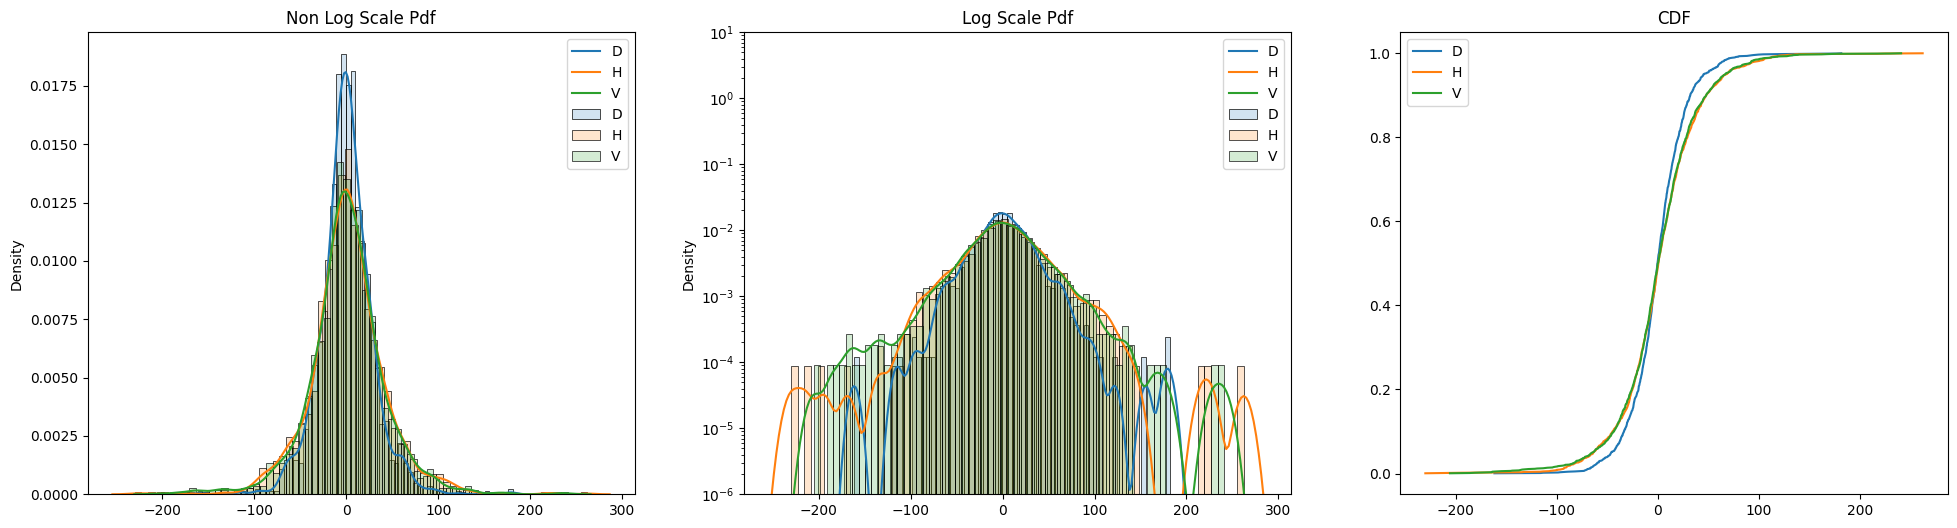

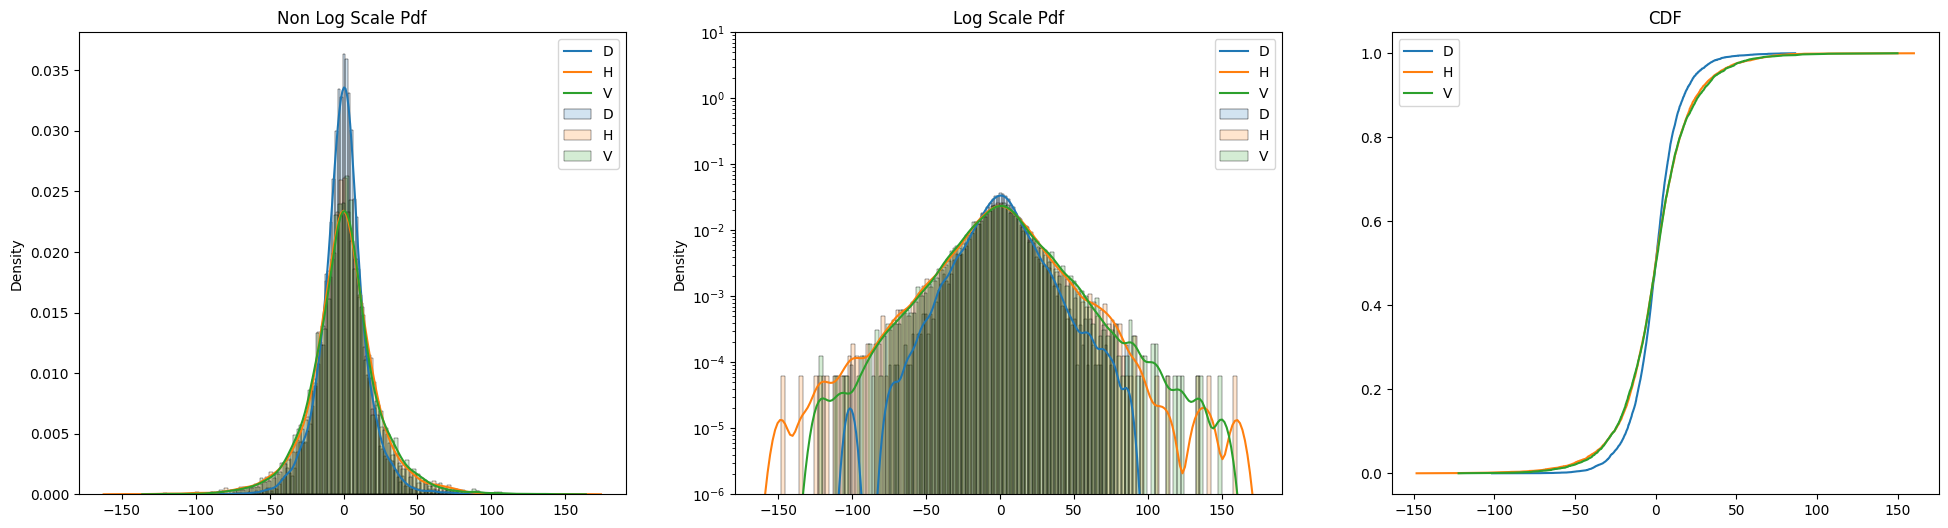

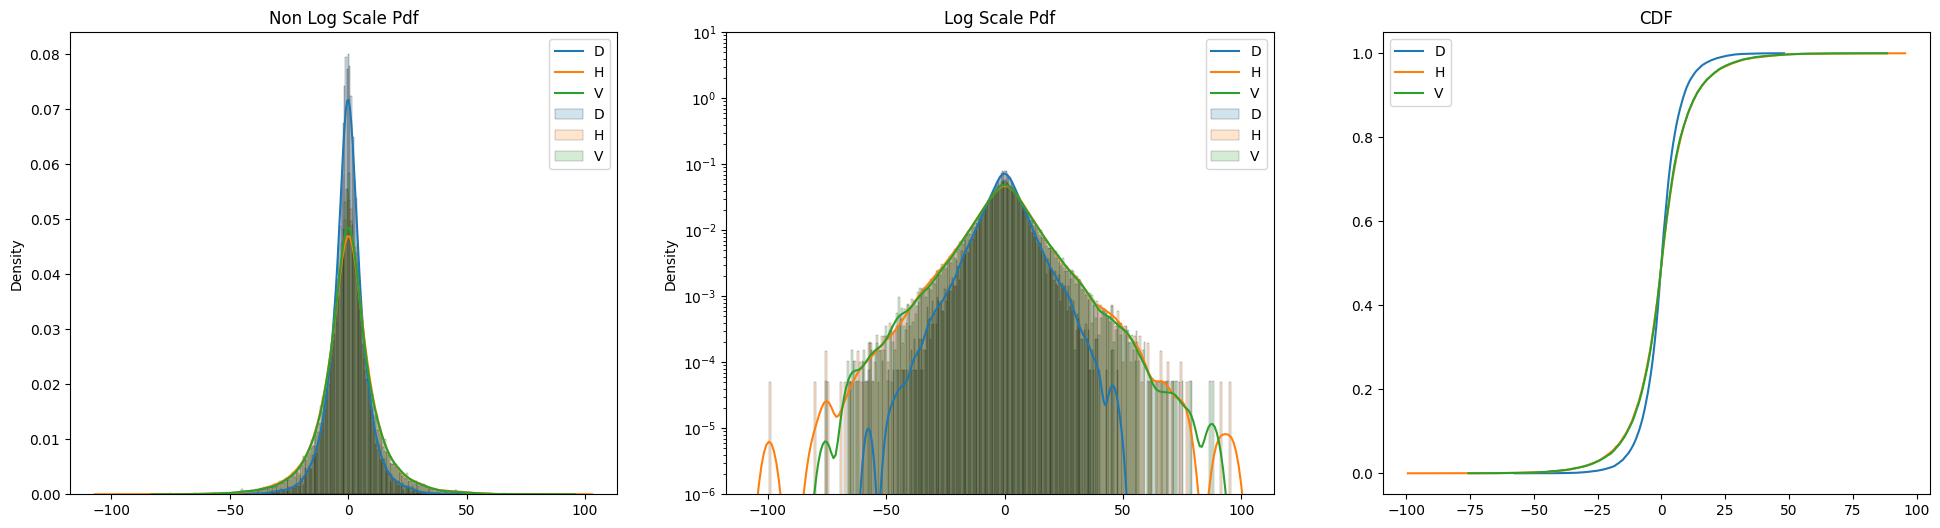

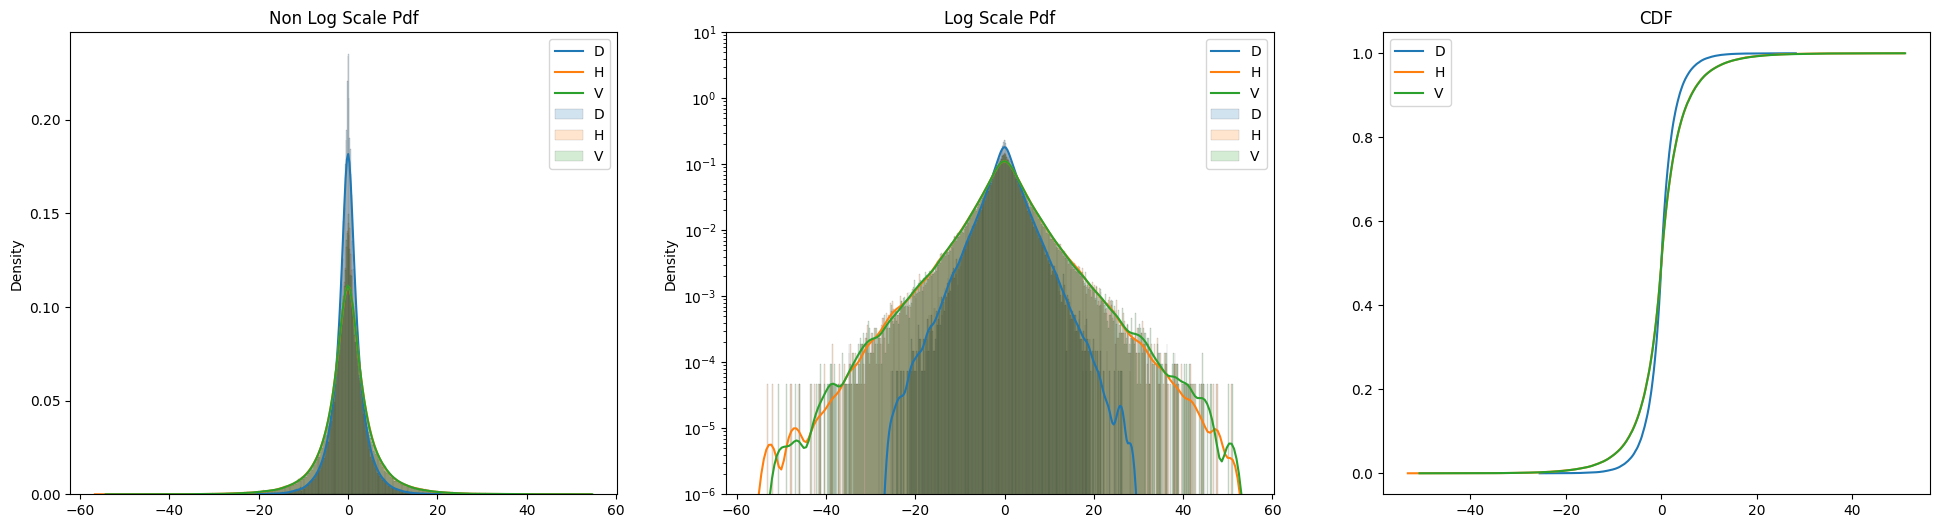

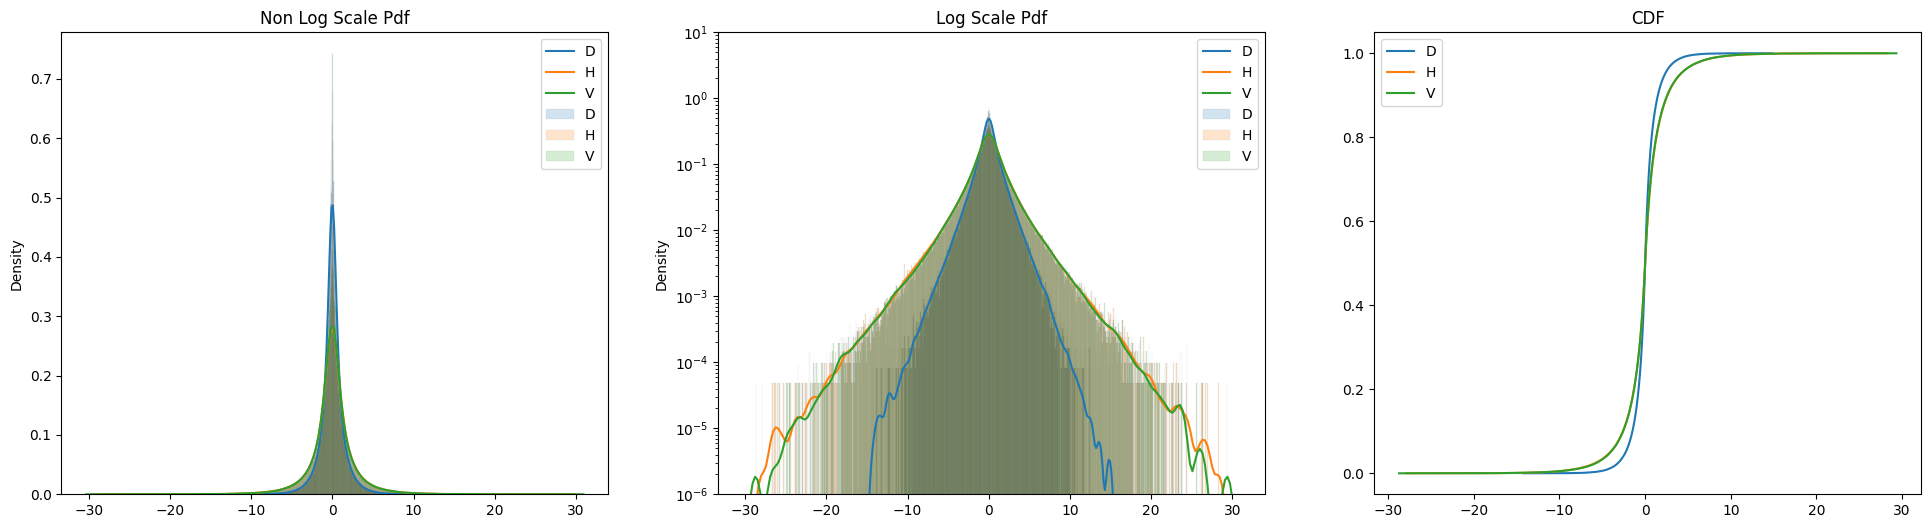

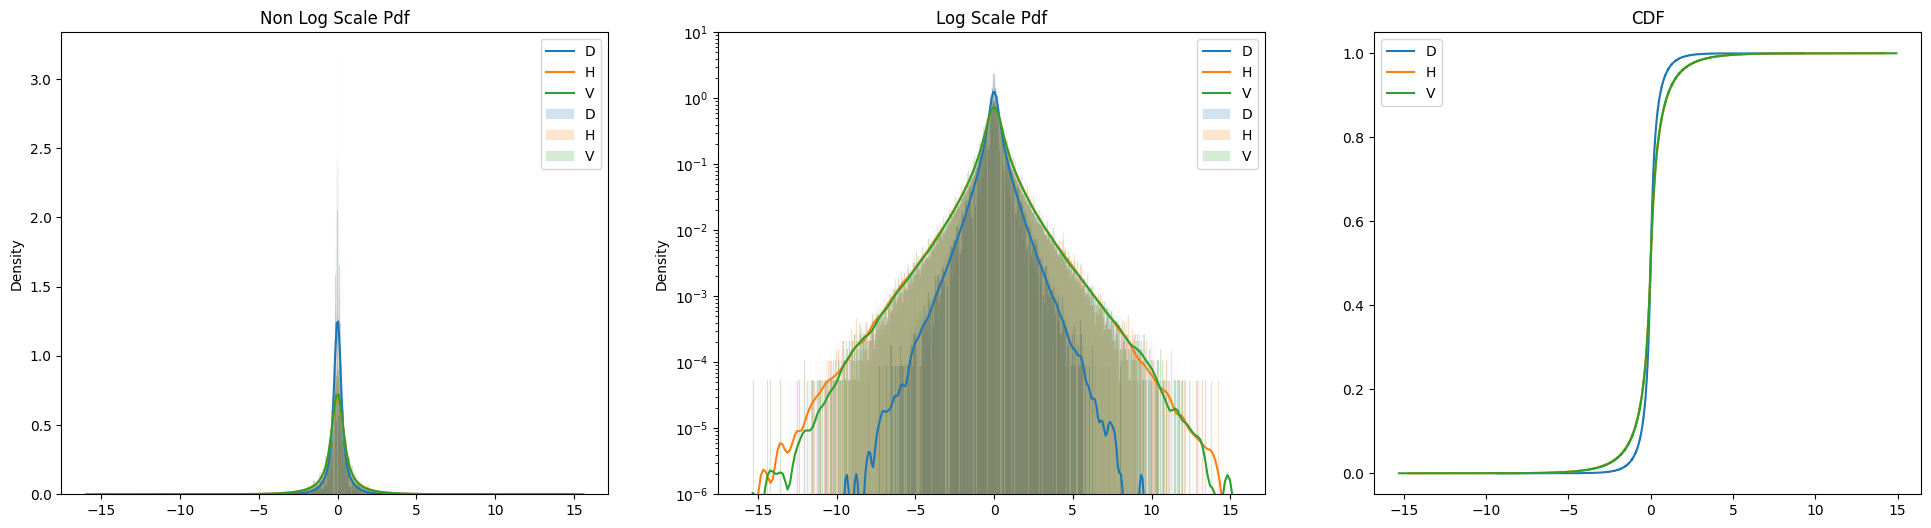

/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


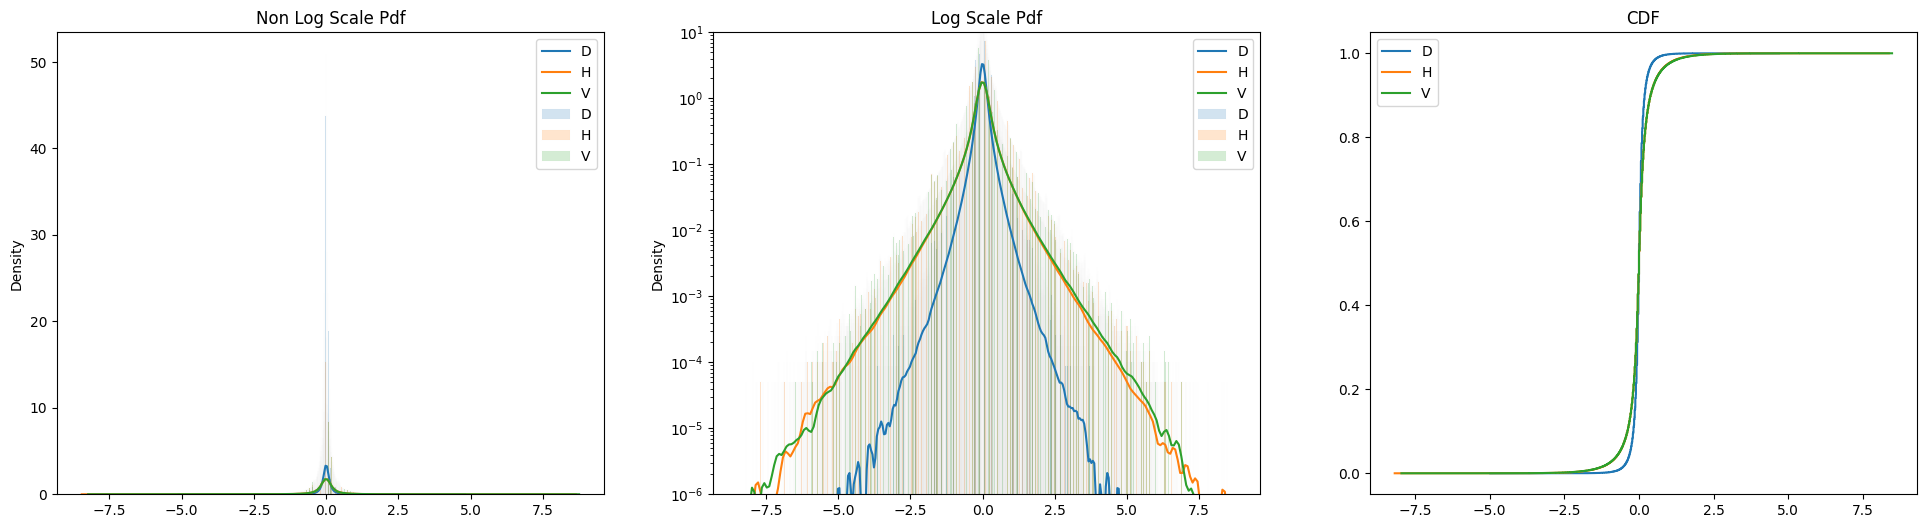

In [10]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


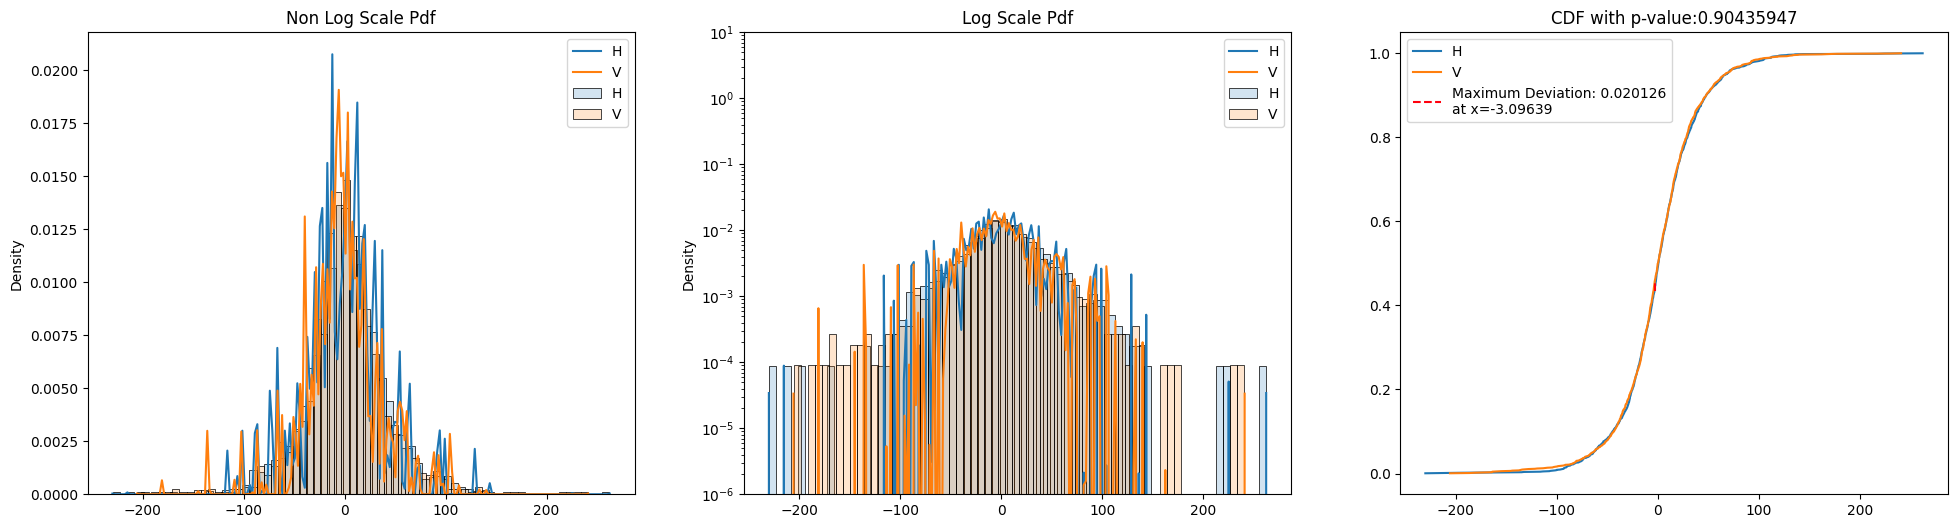

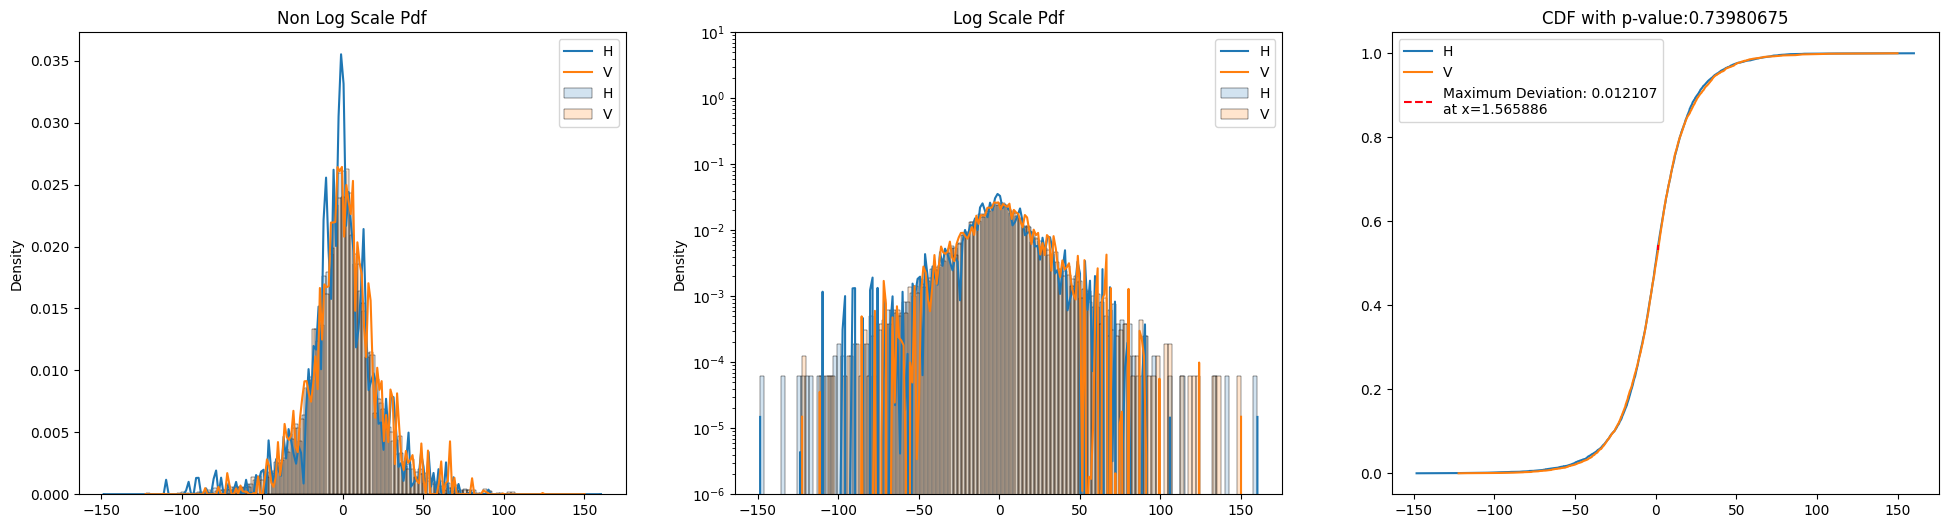

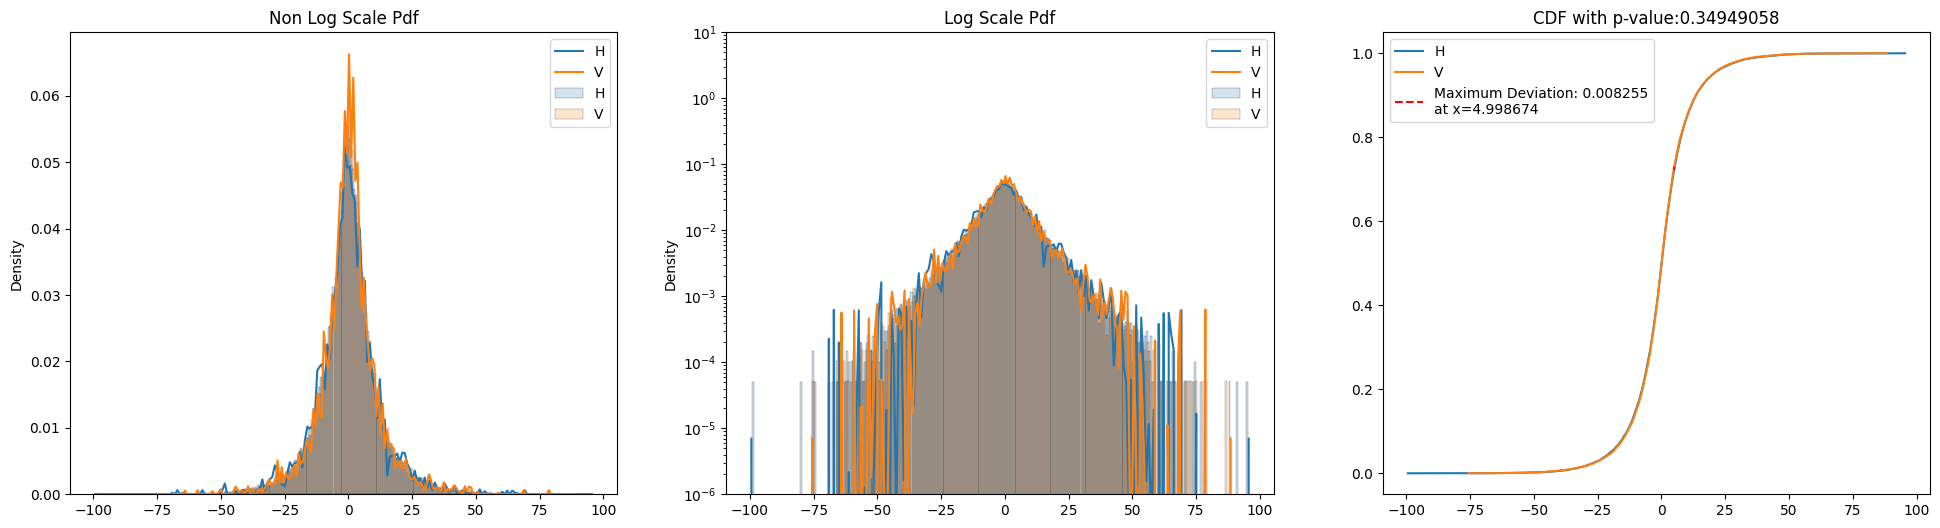

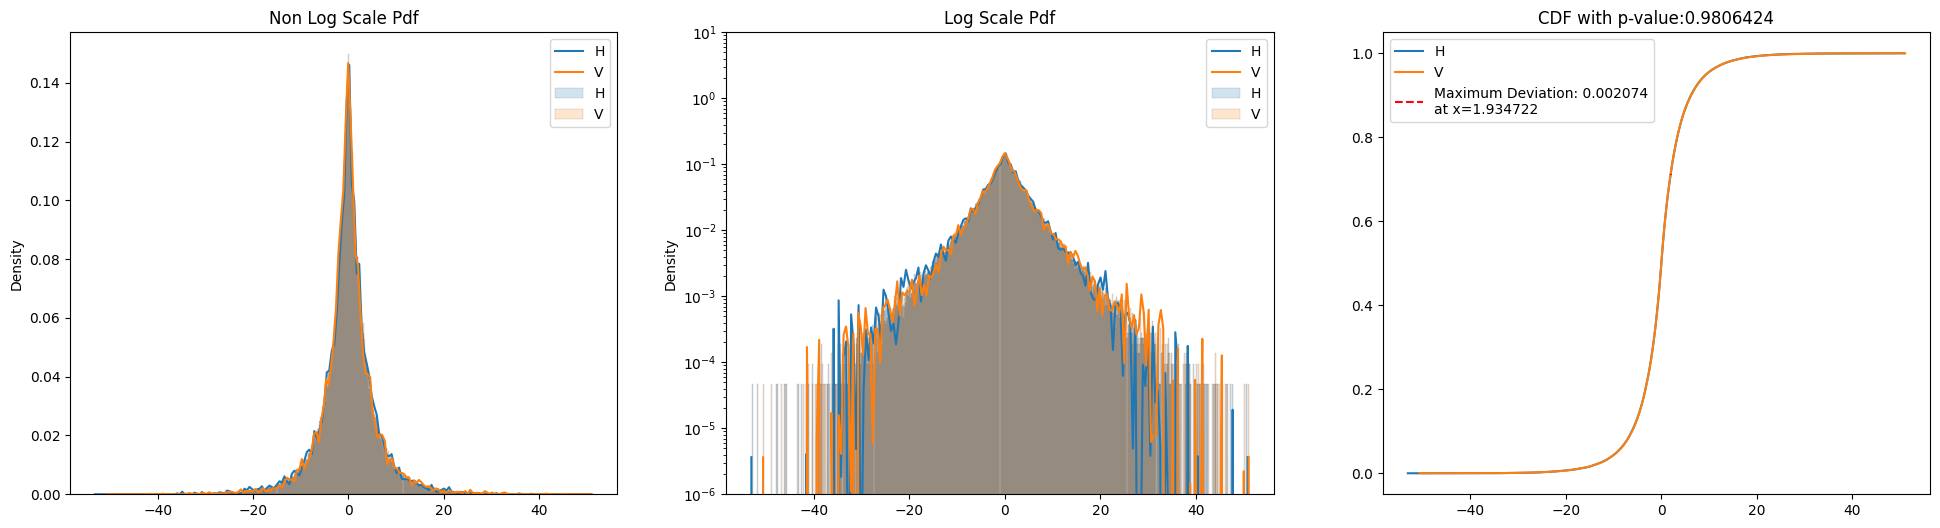

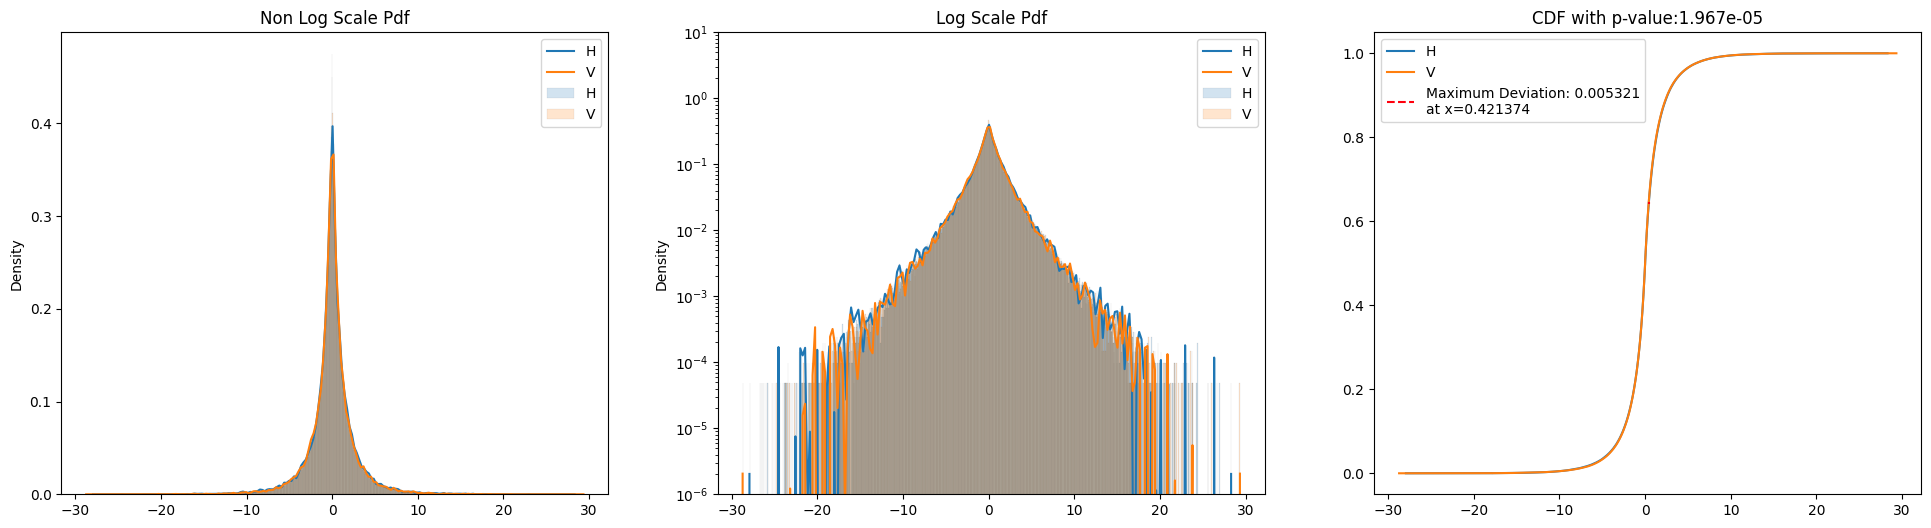

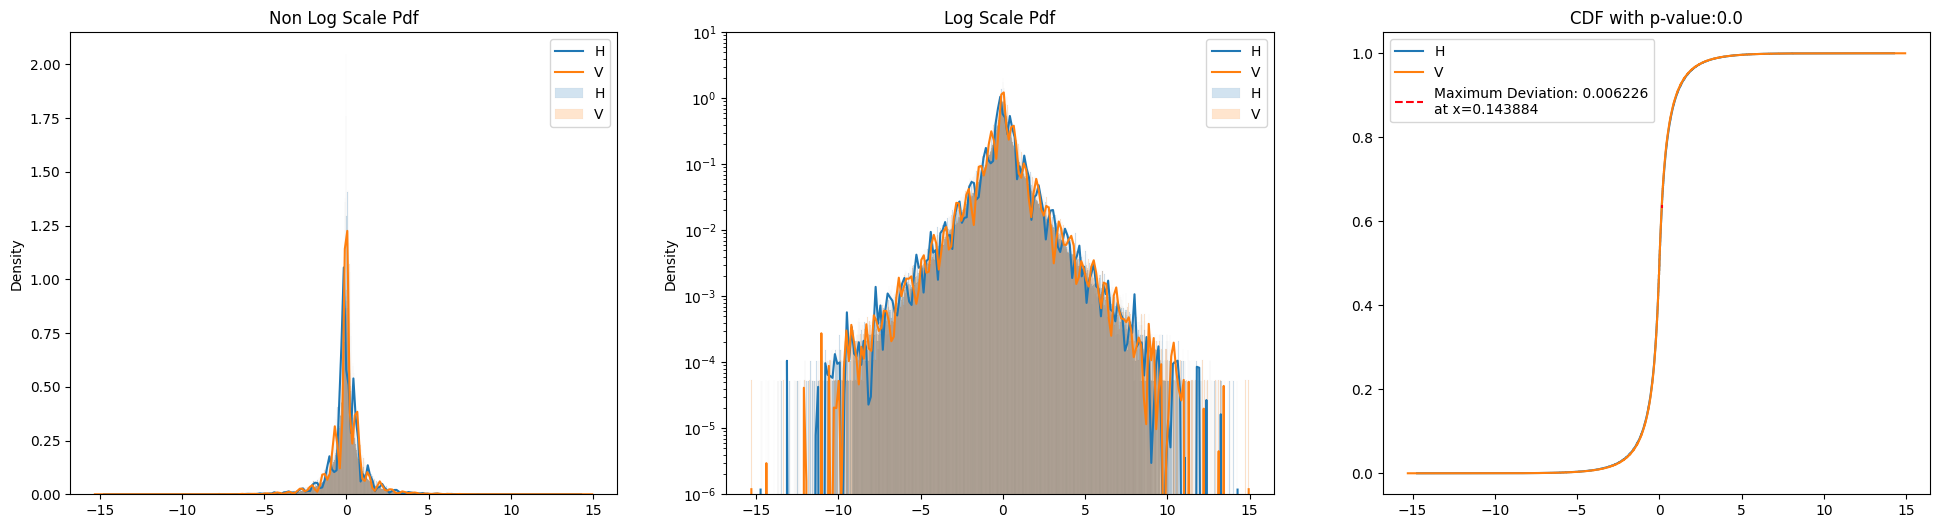

/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


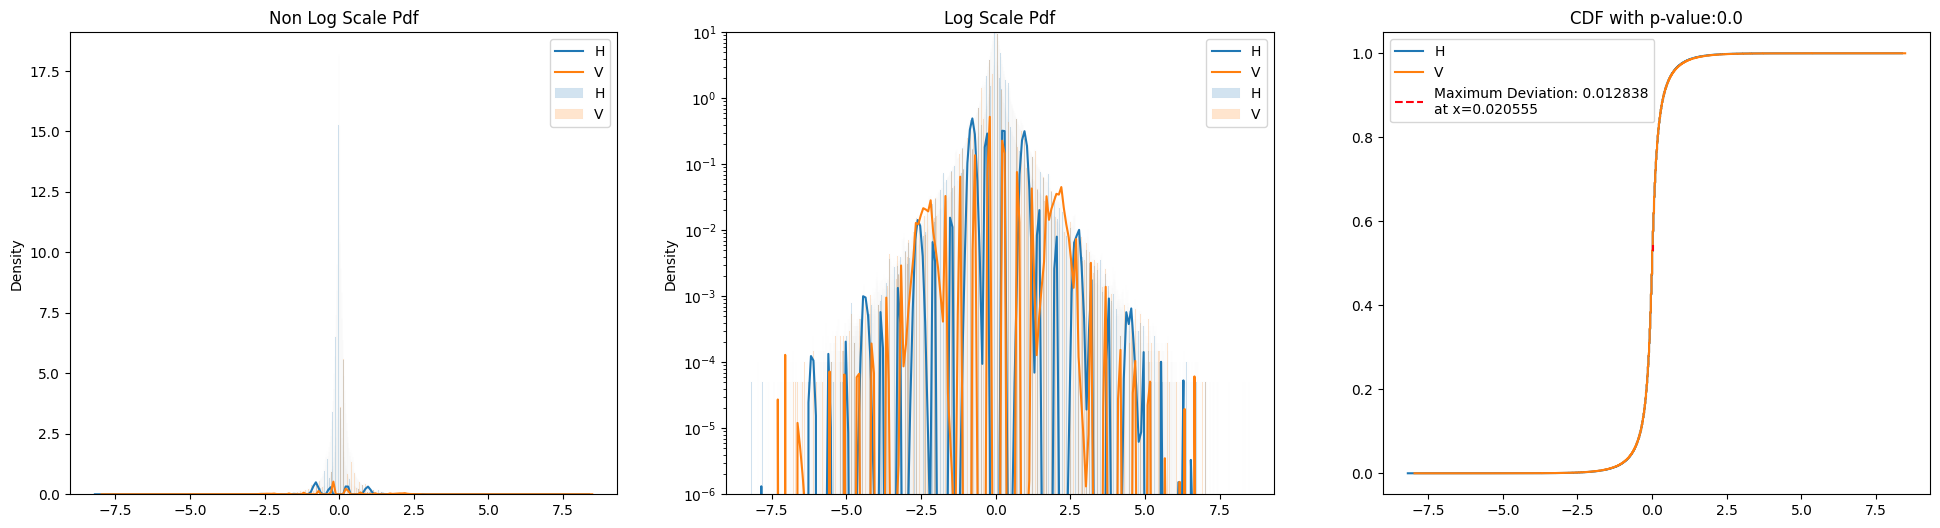

In [12]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V", bw = 0.002)

# Green

In [ ]:
green_wv = convert_to_wavelet_basis(data_dir, "green", debug=True, image_opener = npz_opener)
green_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:03<00:00, 441.80it/s]


channel  layer orientation  \
0   green      1          L1   
1   green      2           D   
2   green      2           H   
3   green      2           V   
4   green      3           D   

                                                data  
0  [5.943411527427855, 43.82470465527514, -6.5293...  
1  [-19.189471886705707, 6.894351253641386, 17.79...  
2  [-48.65227991668068, -70.86198727193987, 5.356...  
3  [53.26468248227639, 7.895951920029962, -23.078...  
4  [33.83268464804892, 3.044488063305658, -9.6178...

In [ ]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_71454/3122142642.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.013836   9.980740e-01
1     2     D      V  0.076101   1.992333e-04
0     2     D      H  0.082390   4.072071e-05
2     3     H      V  0.010692   8.604217e-01
1     3     D      V  0.078616   1.634646e-17
0     3     D      H  0.080818   1.746066e-18
2     4     H      V  0.010377   1.282626e-01
1     4     D      V  0.076926   6.501580e-66
0     4     D      H  0.082704   3.903531e-76
2     5     H      V  0.003705   4.861875e-01
1     5     D      V  0.083510  3.917565e-309
0     5     D      H  0.084955  6.351708e-320
2     6     H      V  0.006496   6.922573e-08
1     6     D      V  0.082274   0.000000e+00
0     6     D      H  0.087596   0.000000e+00
2     7     H      V  0.007227   2.318280e-37
1     7     D      V  0.083816   0.000000e+00
0     7     D      H  0.089791   0.000000e+00
2     8     H      V  0.015481   0.000000e+00
0     8     D      H  0.110190   0.000000e+00
1     8     D      V  0.111874   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


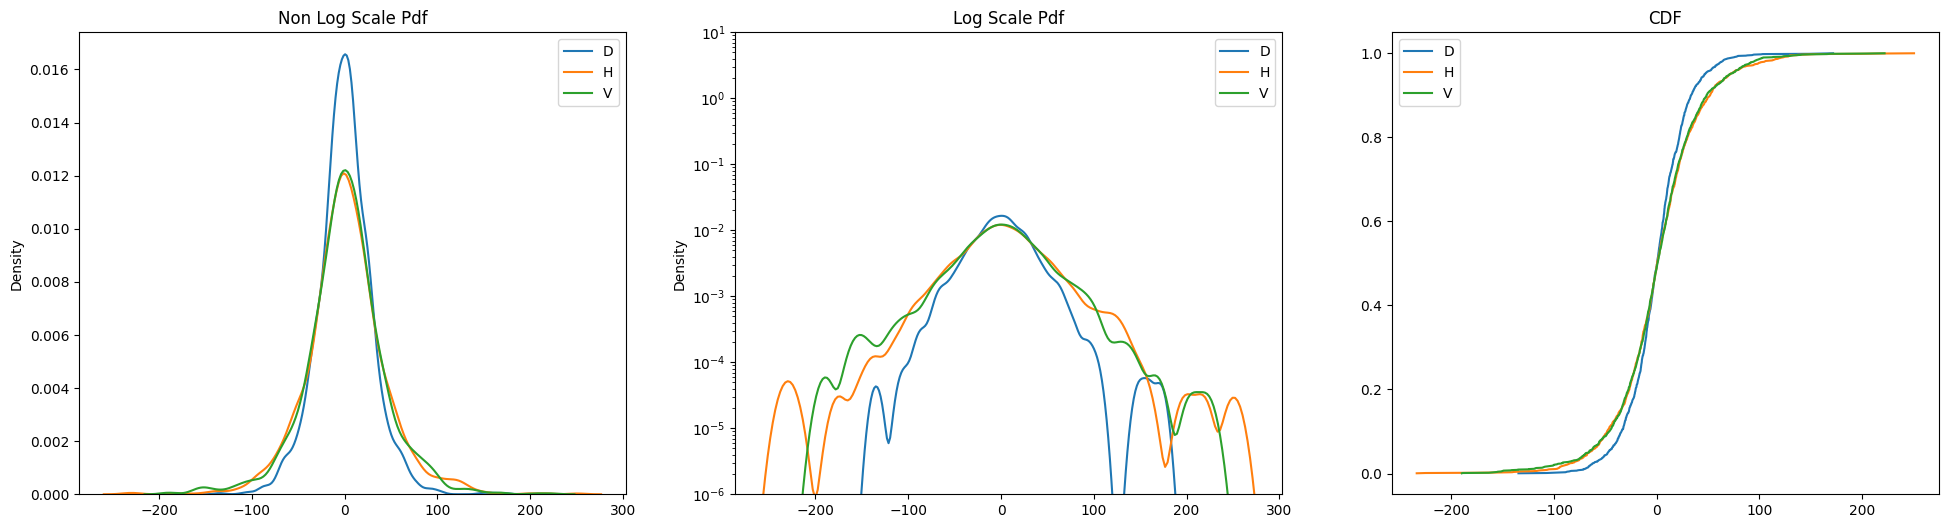

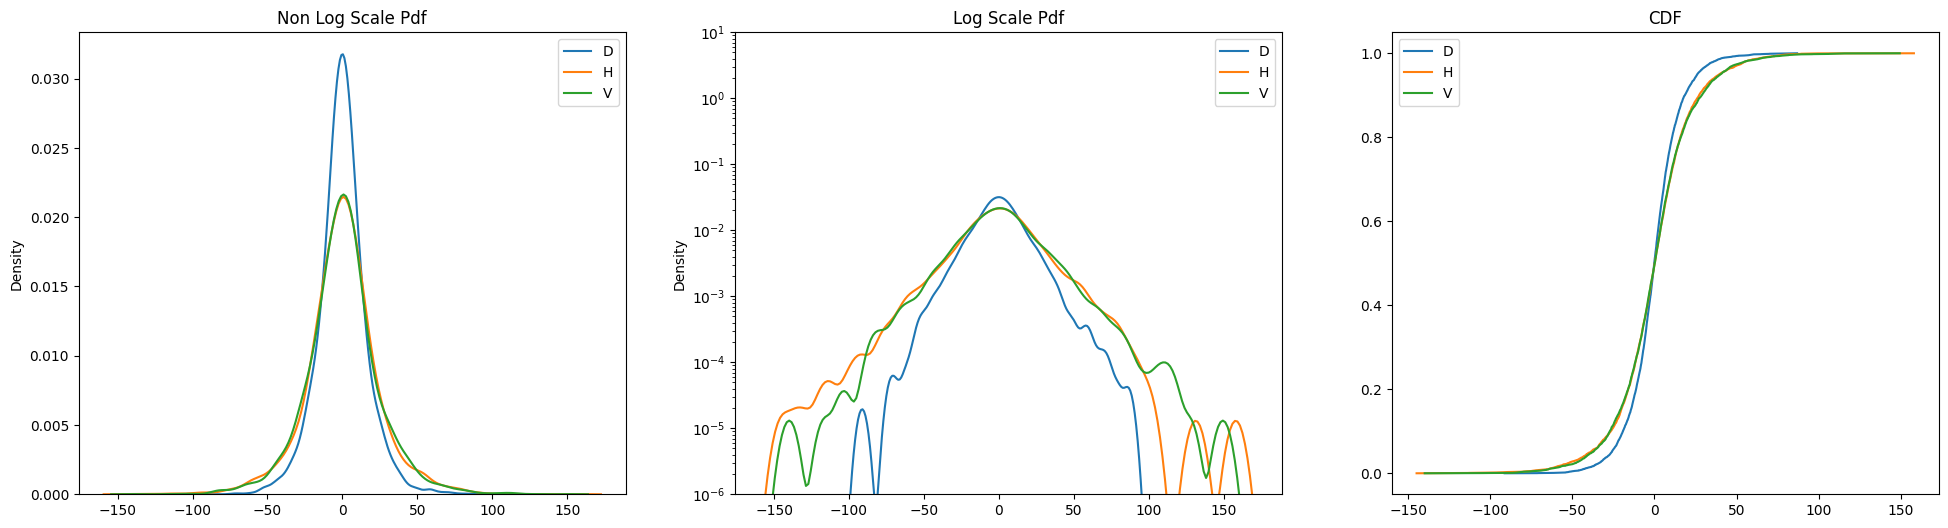

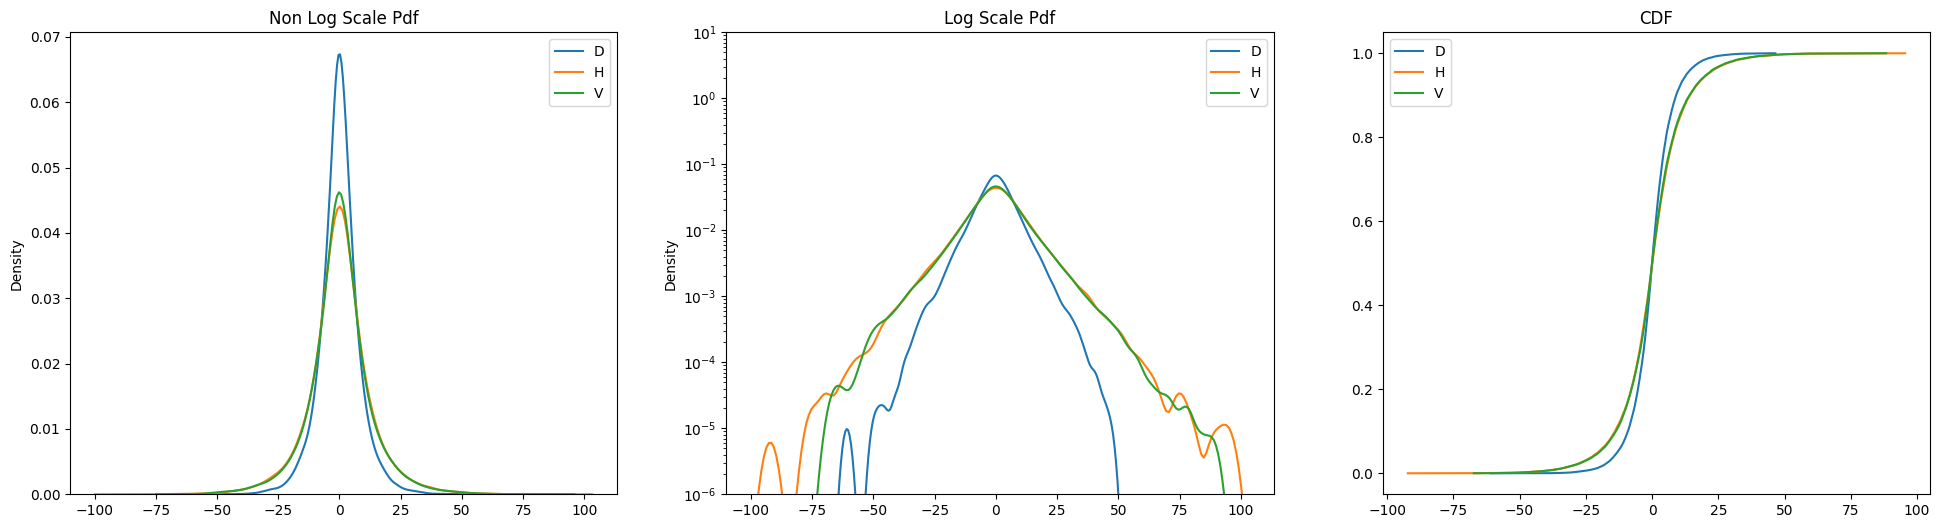

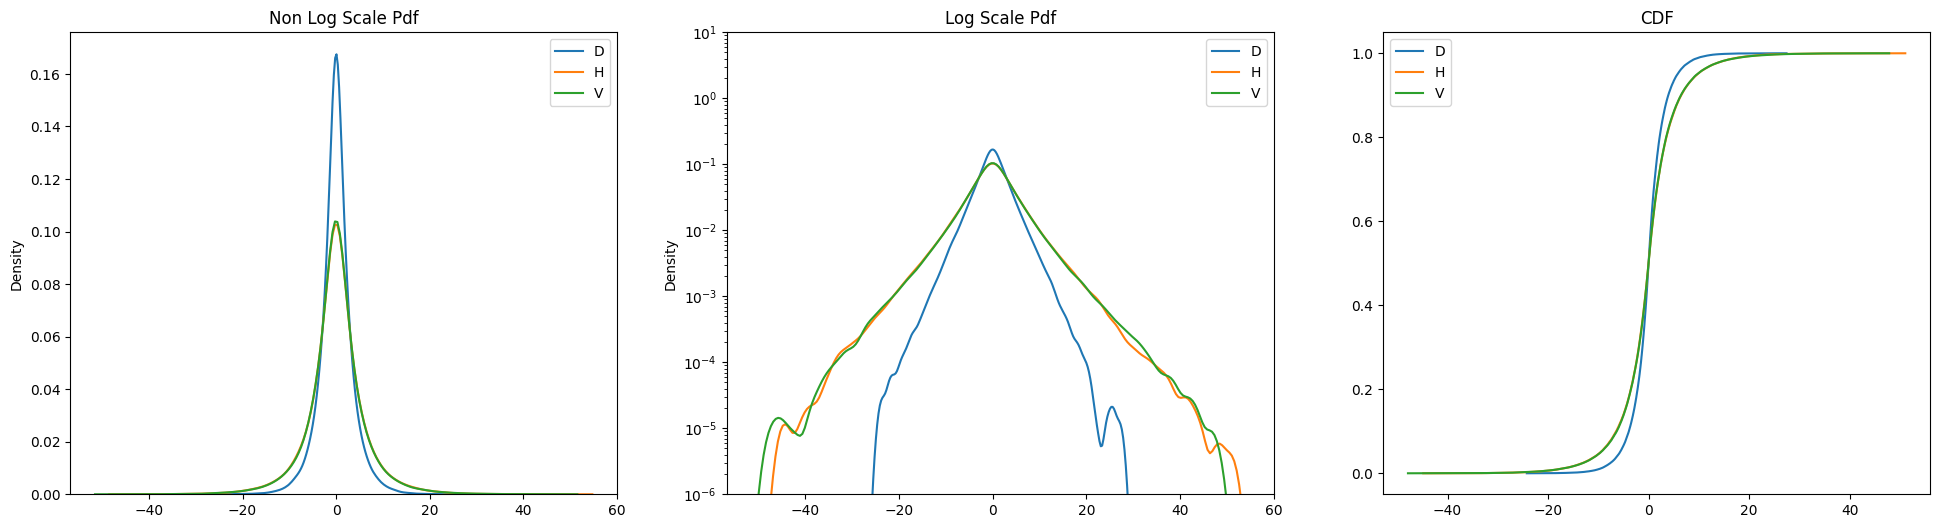

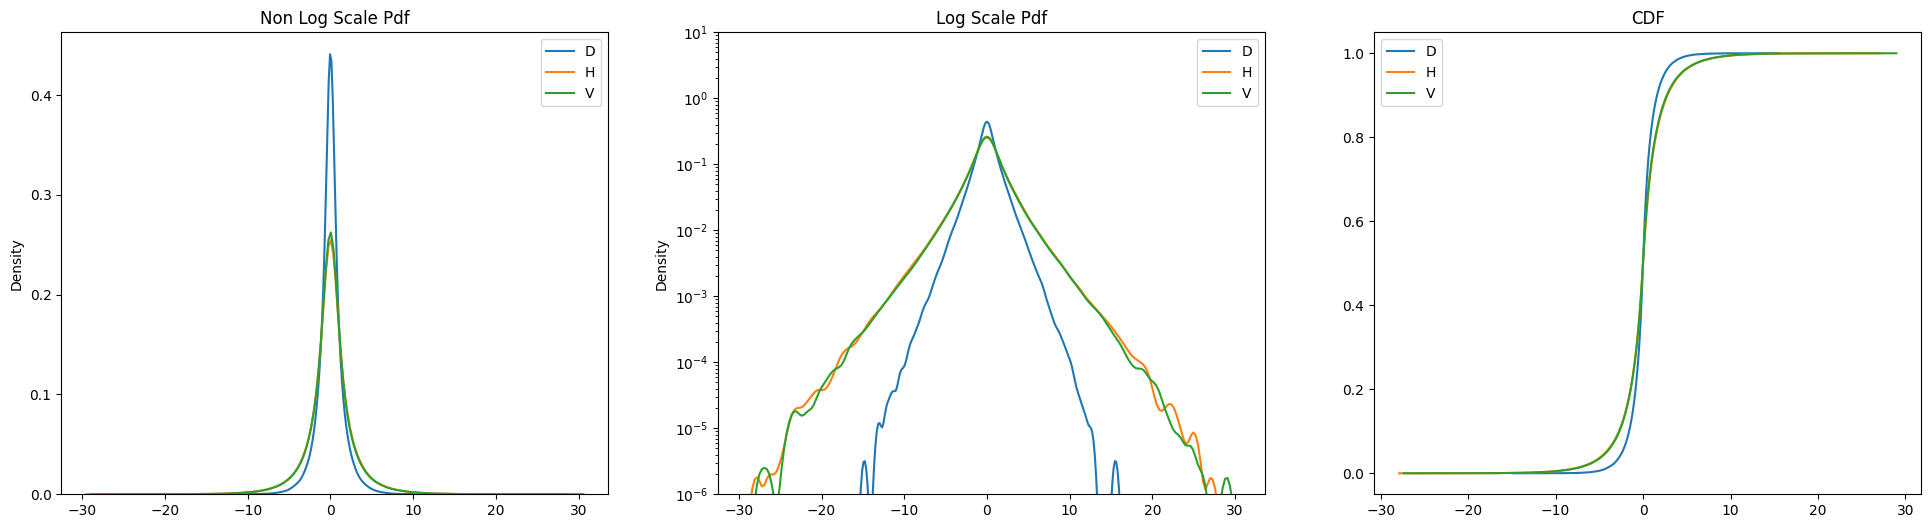

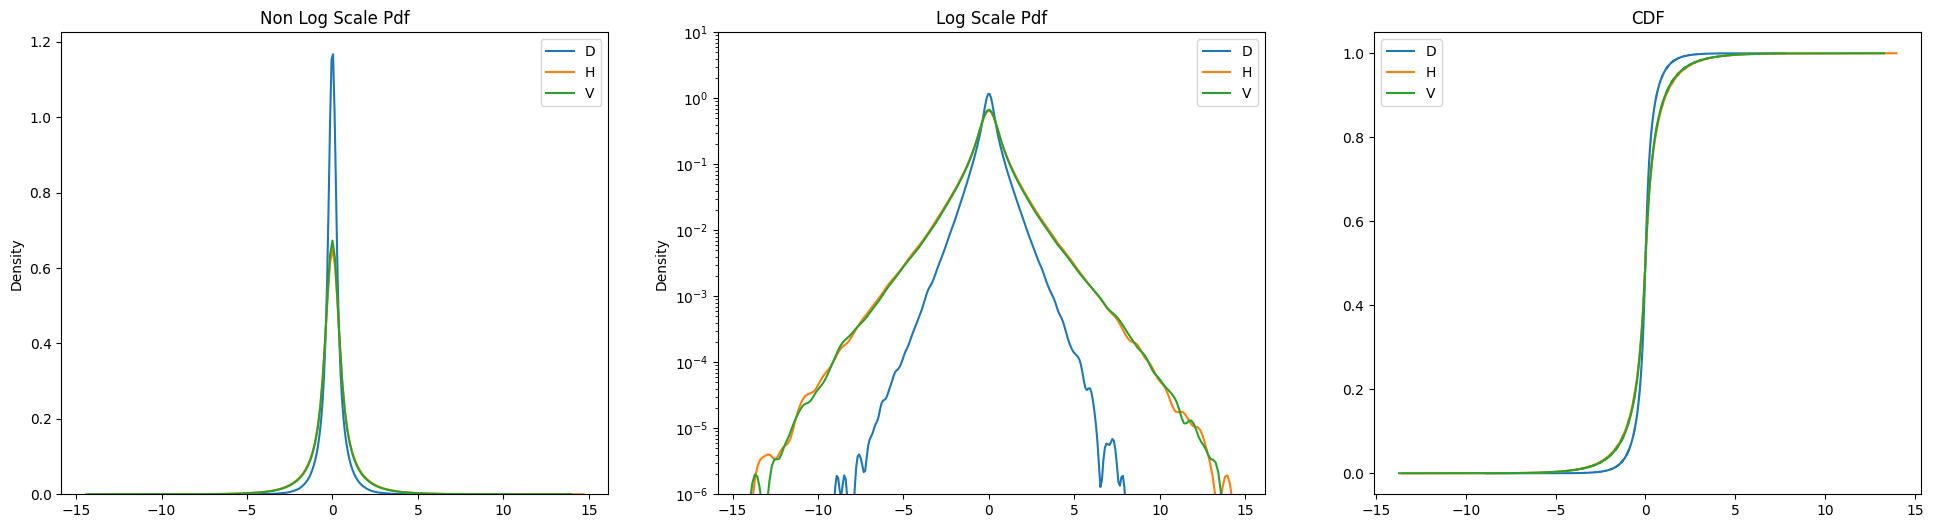

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


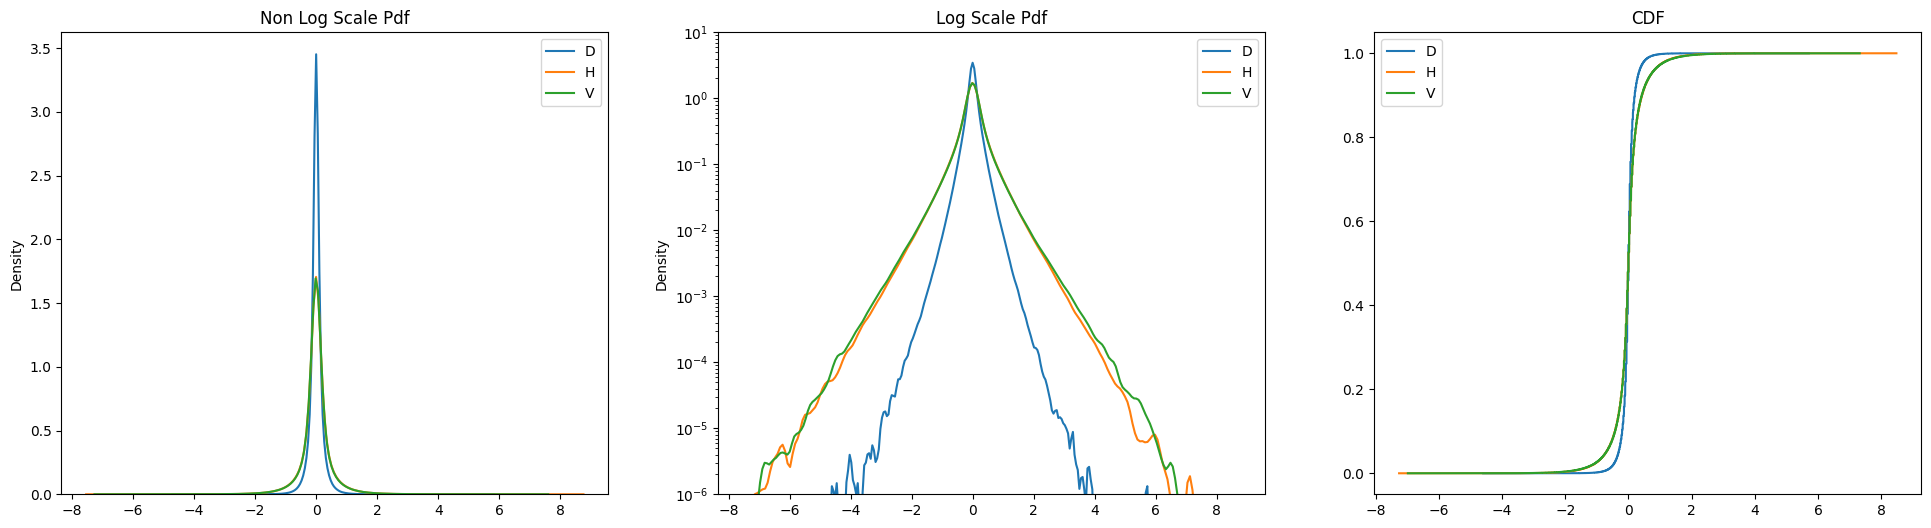

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


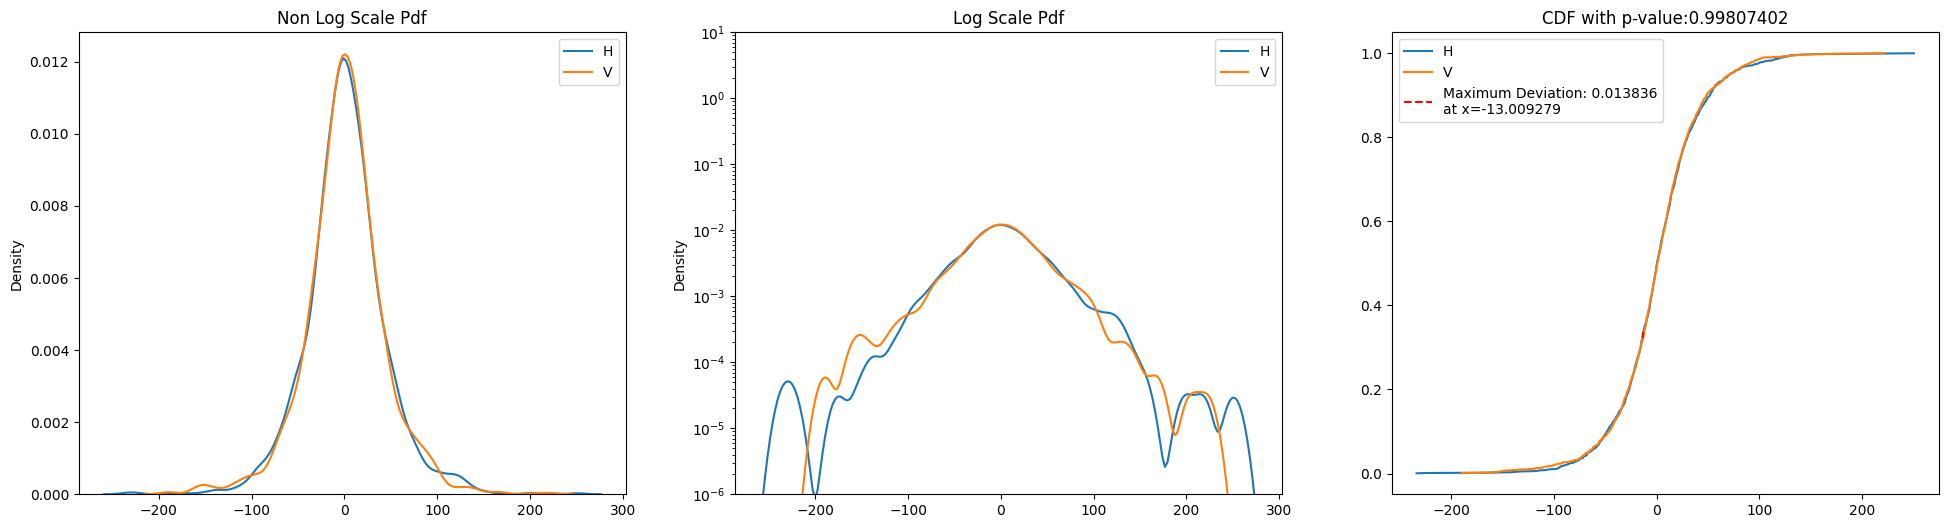

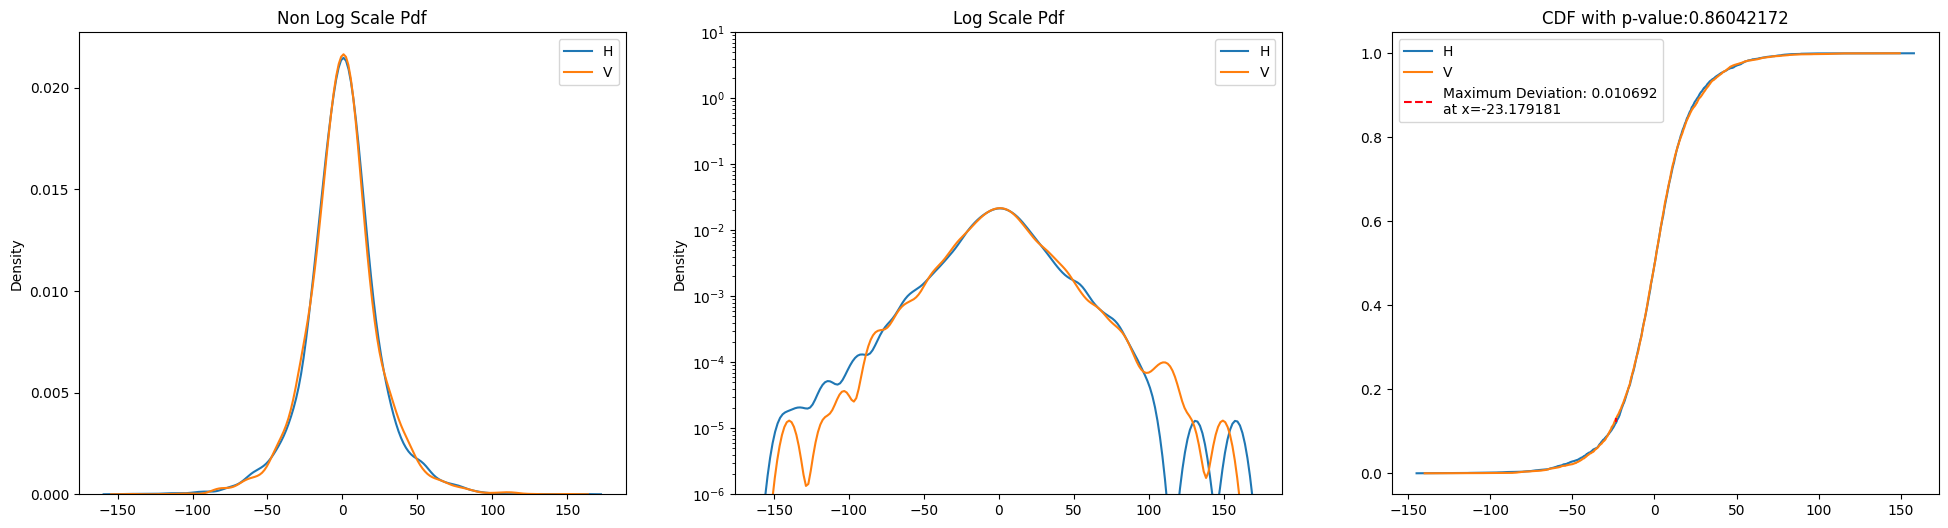

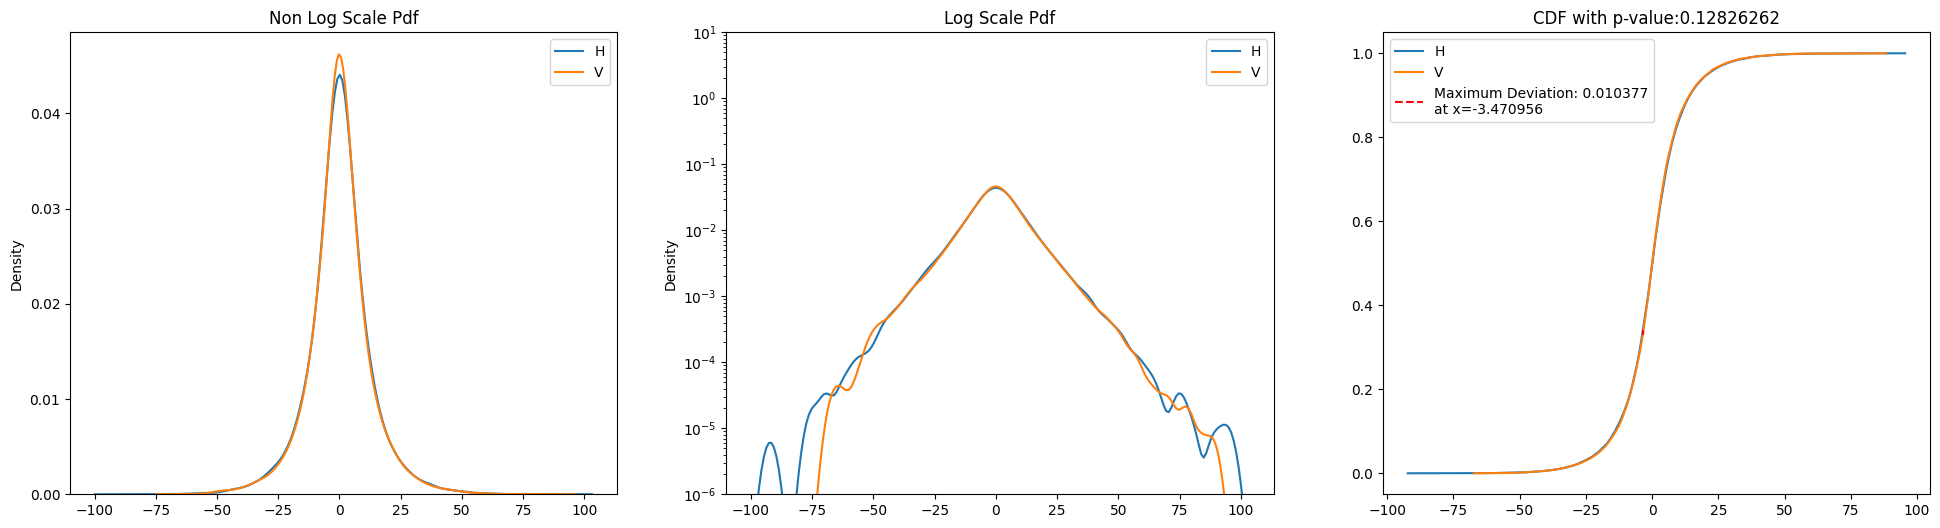

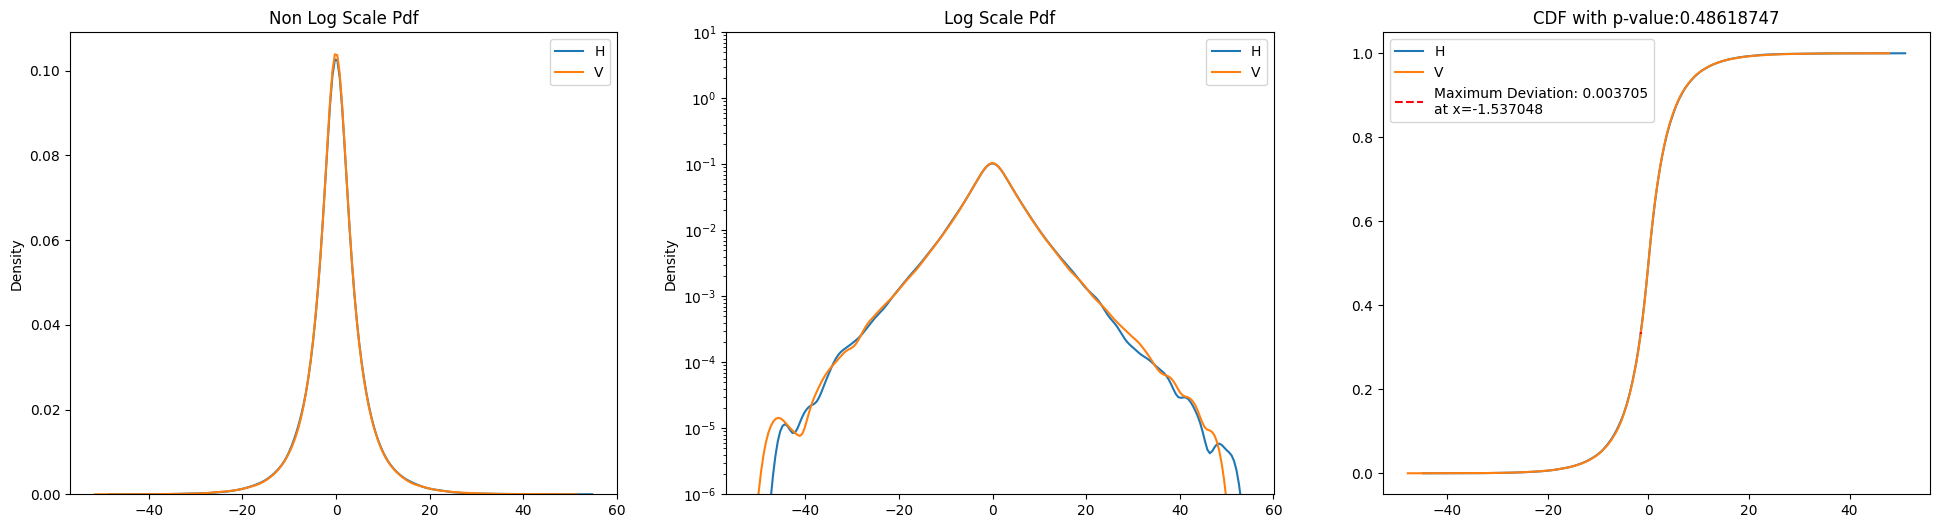

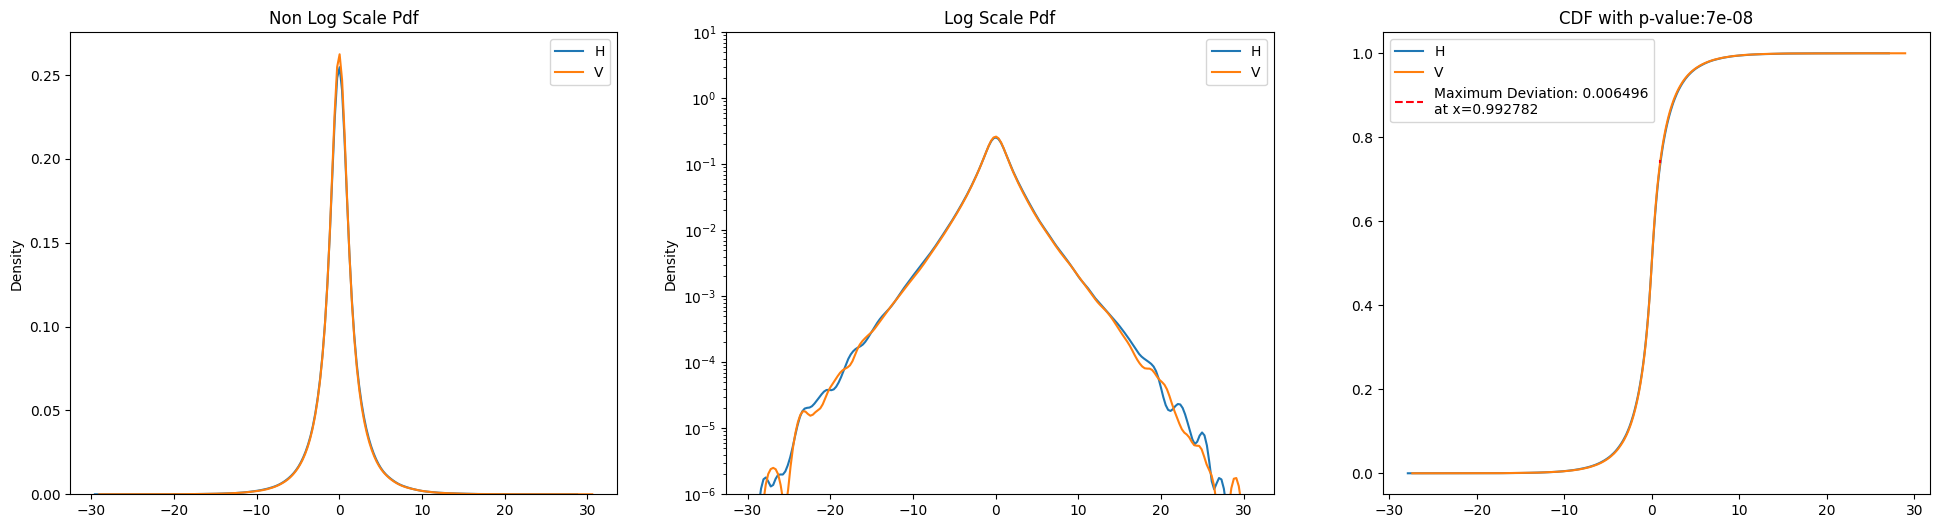

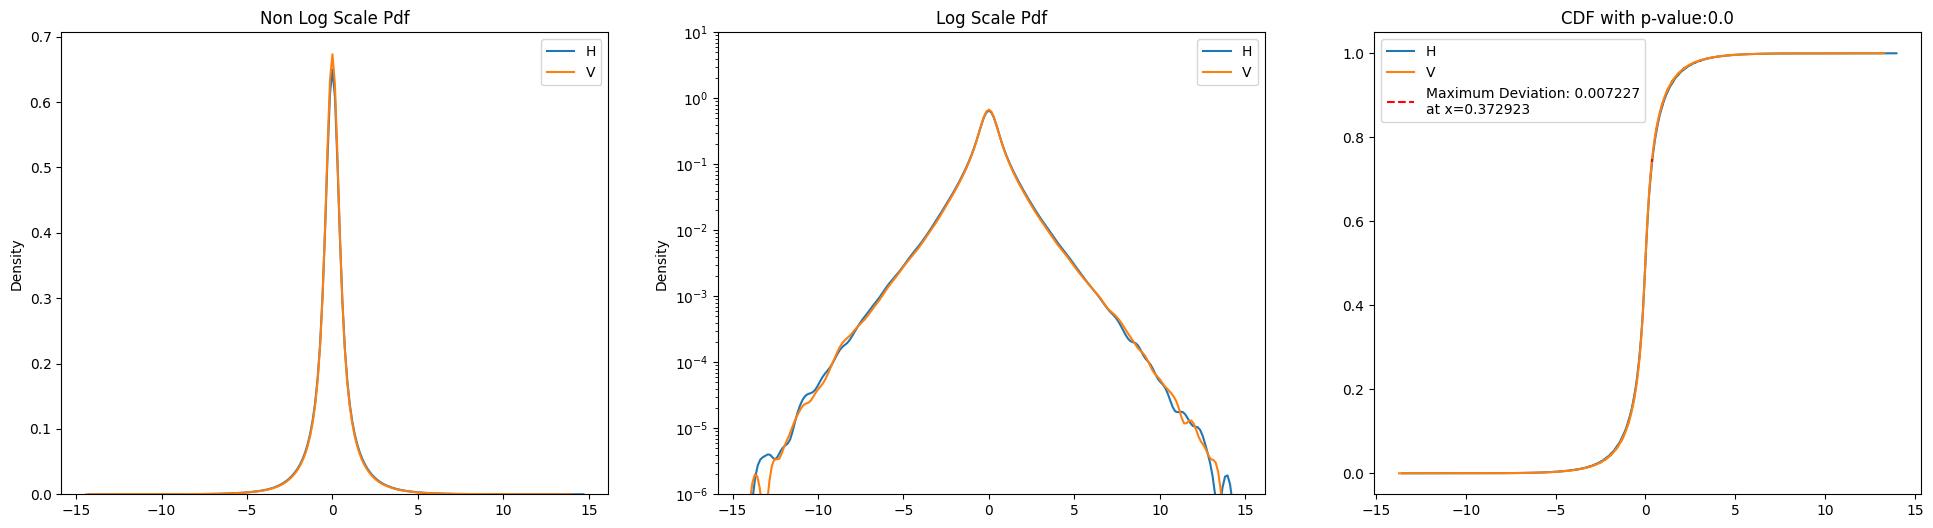

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


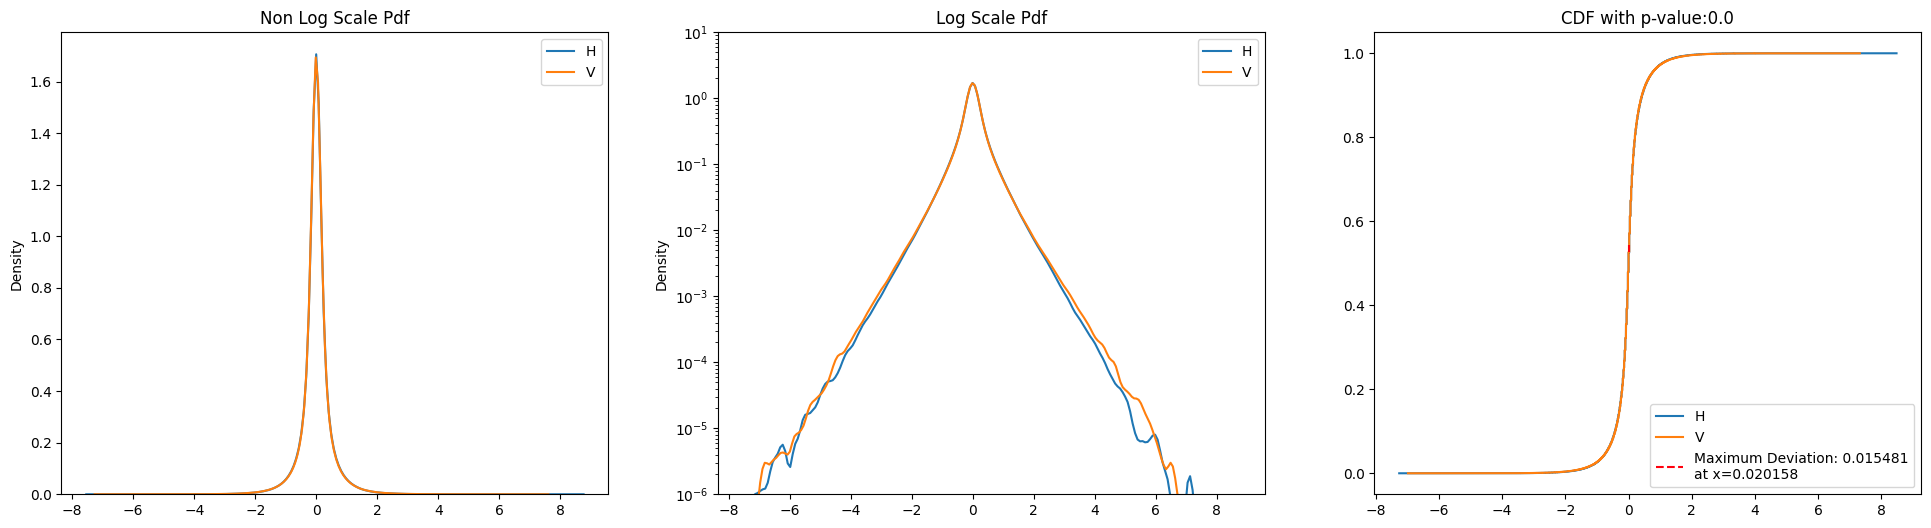

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [ ]:
blue_wv = convert_to_wavelet_basis(data_dir, "blue", debug=True, image_opener = npz_opener)
blue_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:03<00:00, 468.02it/s]


channel  layer orientation  \
0    blue      1          L1   
1    blue      2           D   
2    blue      2           H   
3    blue      2           V   
4    blue      3           D   

                                                data  
0  [0.20727113649652296, -33.177453123473356, -23...  
1  [-26.155532988844868, 6.104465266644759, 21.78...  
2  [-90.20362065244164, -75.99398703605019, 19.31...  
3  [76.46530079030859, 12.720115526860187, -29.55...  
4  [53.602418056907794, 3.668749109852314, -16.50...

In [ ]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_71454/3852482873.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.018868   9.398510e-01
1     2     D      V  0.069811   8.589724e-04
0     2     D      H  0.081132   5.650952e-05
2     3     H      V  0.012421   7.105110e-01
0     3     D      H  0.076258   1.676037e-16
1     3     D      V  0.079560   6.315730e-18
2     4     H      V  0.005346   8.584070e-01
1     4     D      V  0.079049   1.395148e-69
0     4     D      H  0.080975   5.358065e-73
2     5     H      V  0.001887   9.933696e-01
1     5     D      V  0.084395  1.021640e-315
0     5     D      H  0.084552  6.785025e-317
2     6     H      V  0.005034   6.607478e-05
1     6     D      V  0.086065   0.000000e+00
0     6     D      H  0.088082   0.000000e+00
2     7     H      V  0.006375   3.671042e-29
1     7     D      V  0.091076   0.000000e+00
0     7     D      H  0.094100   0.000000e+00
2     8     H      V  0.012543   0.000000e+00
0     8     D      H  0.120075   0.000000e+00
1     8     D      V  0.125987   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


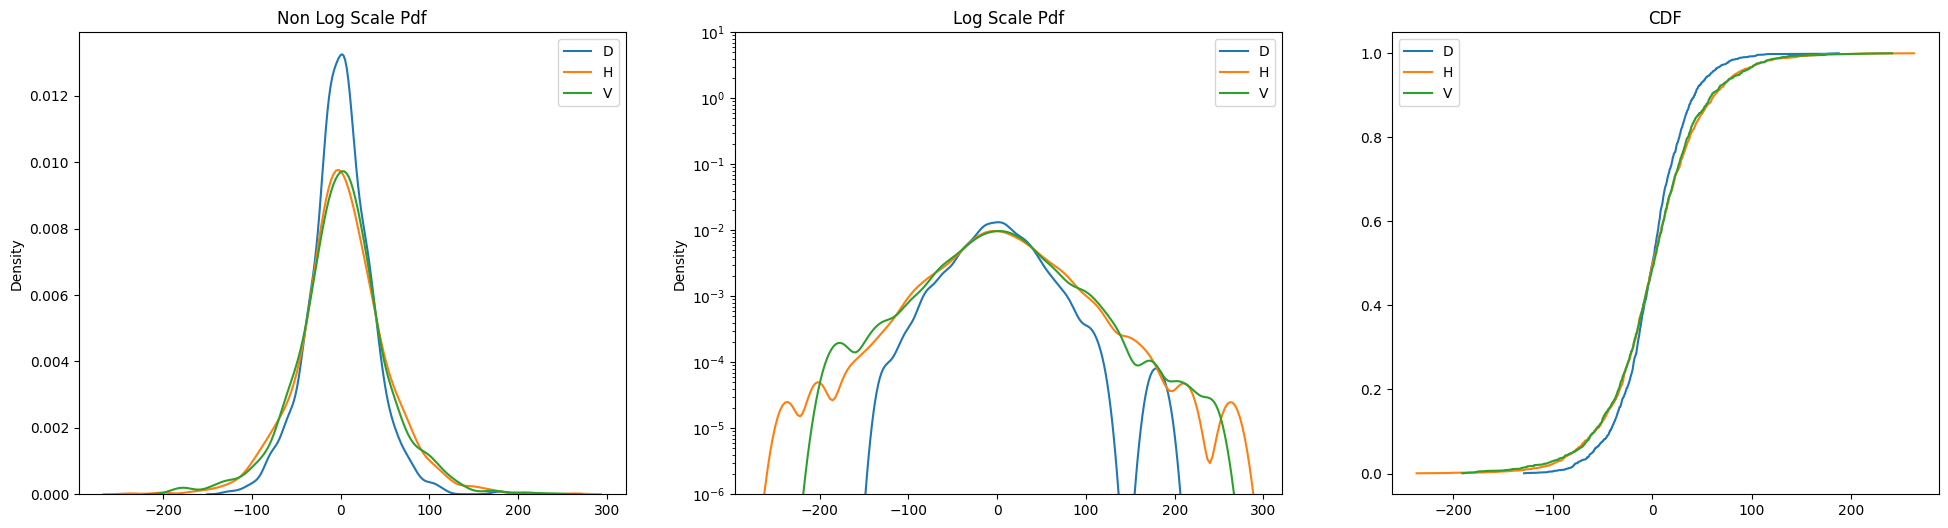

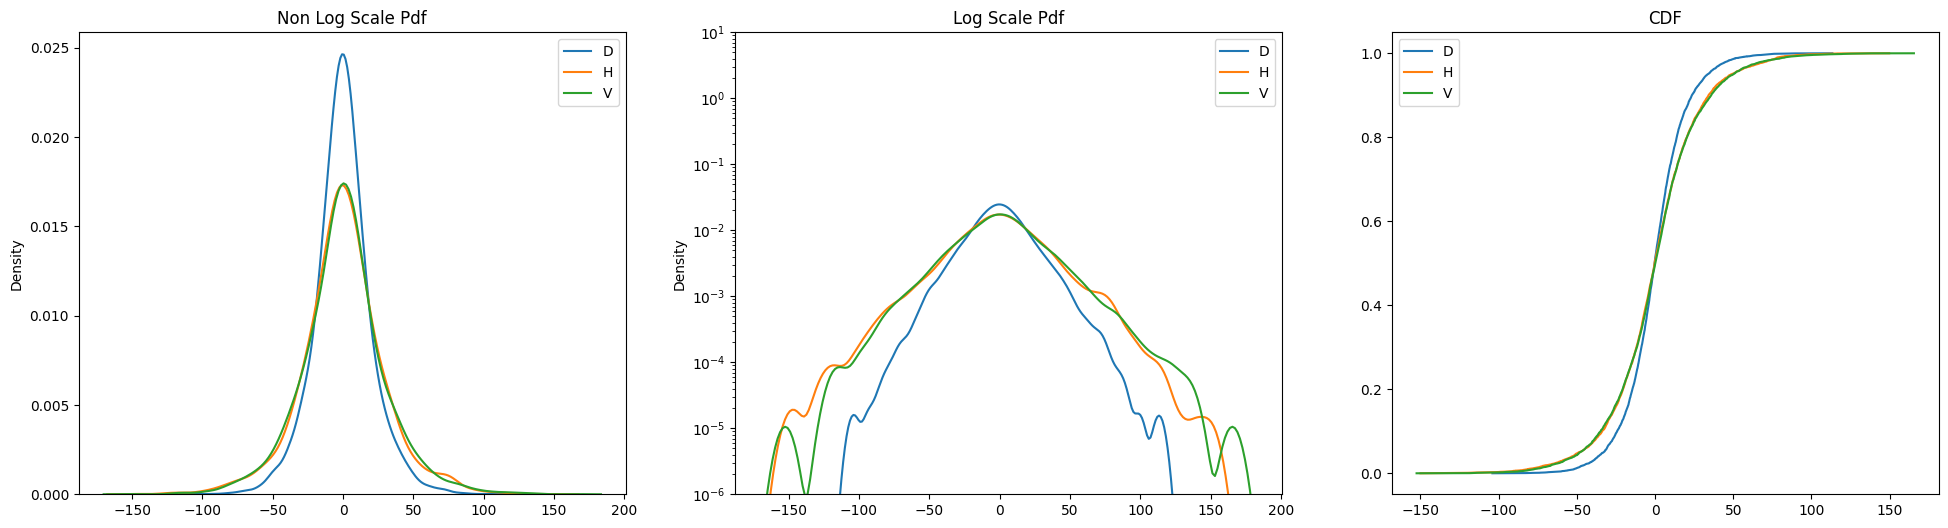

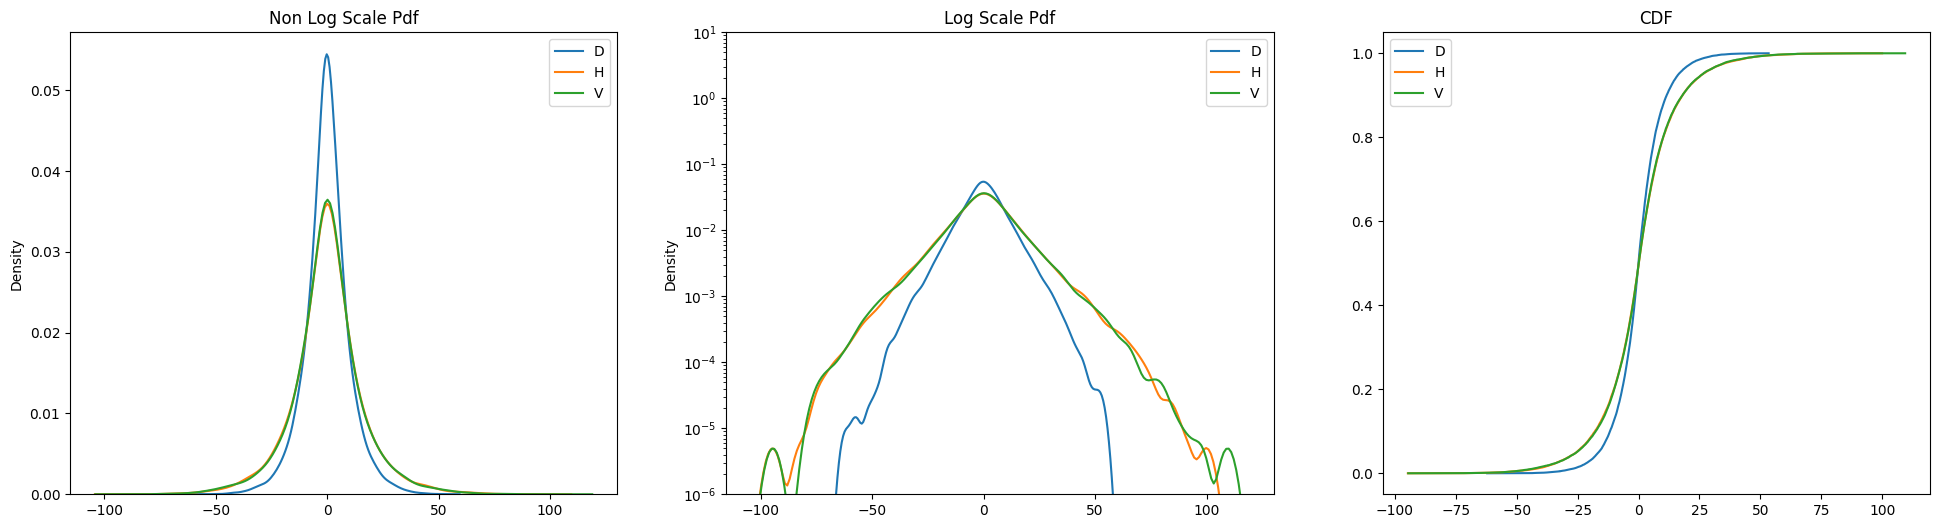

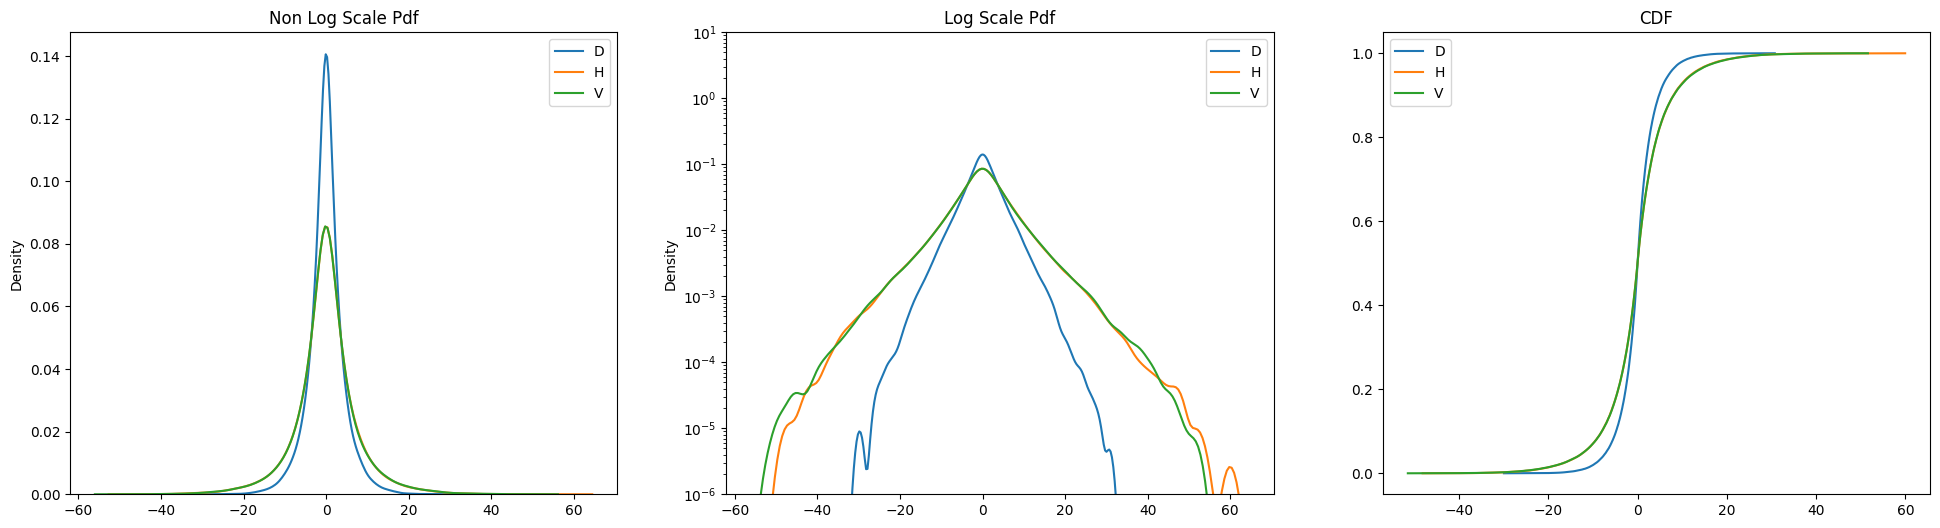

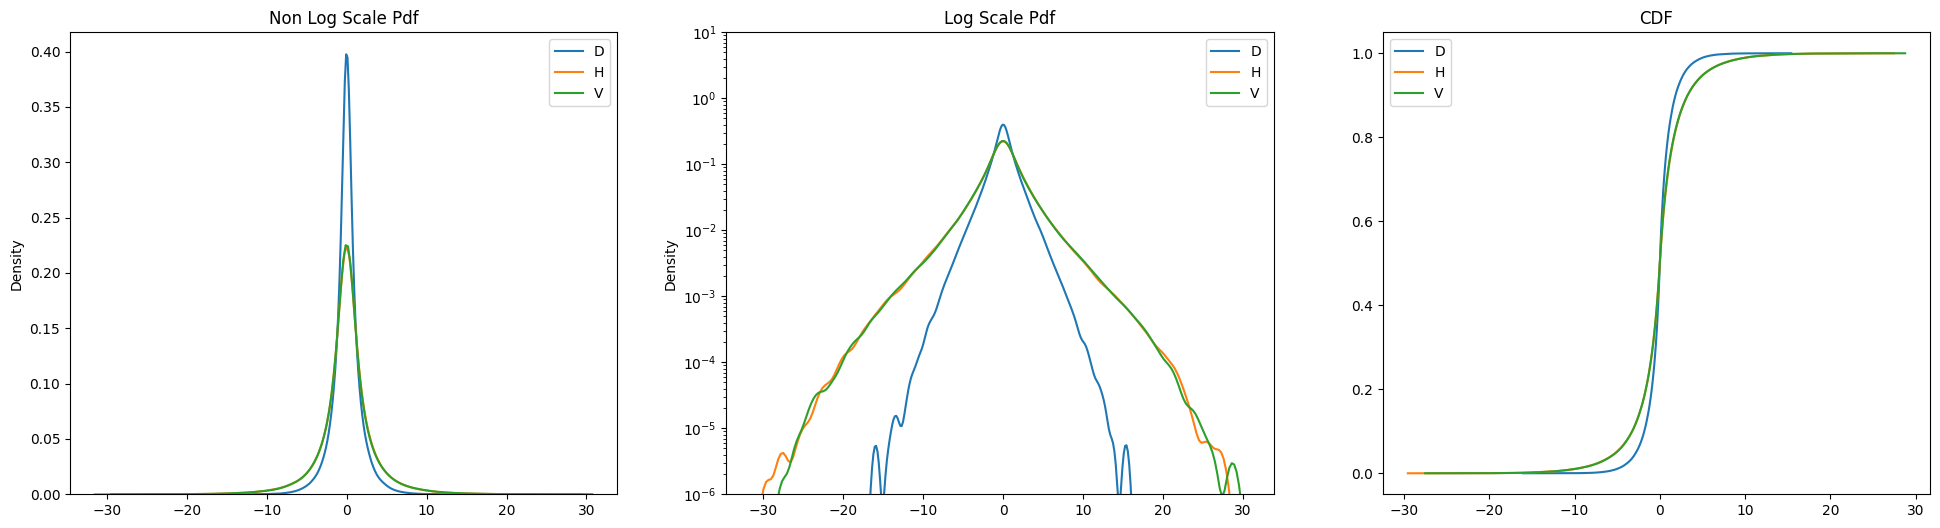

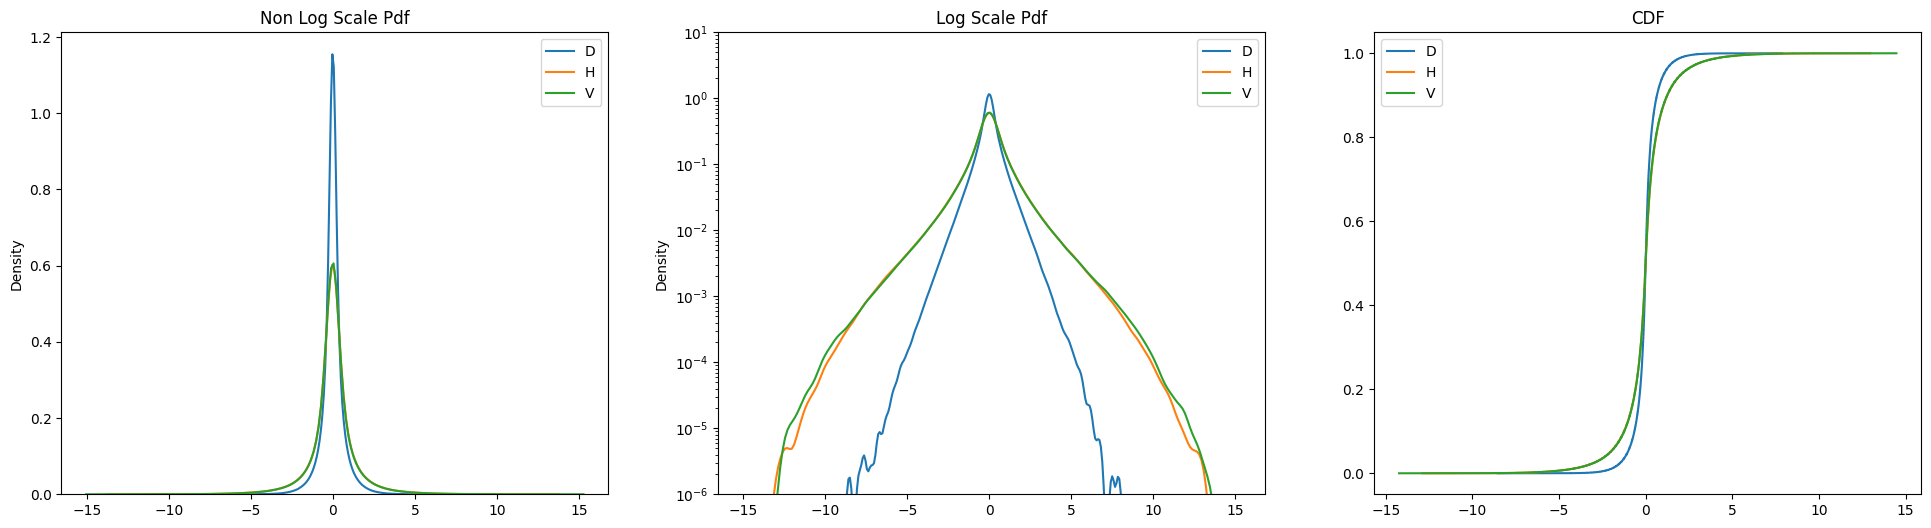

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


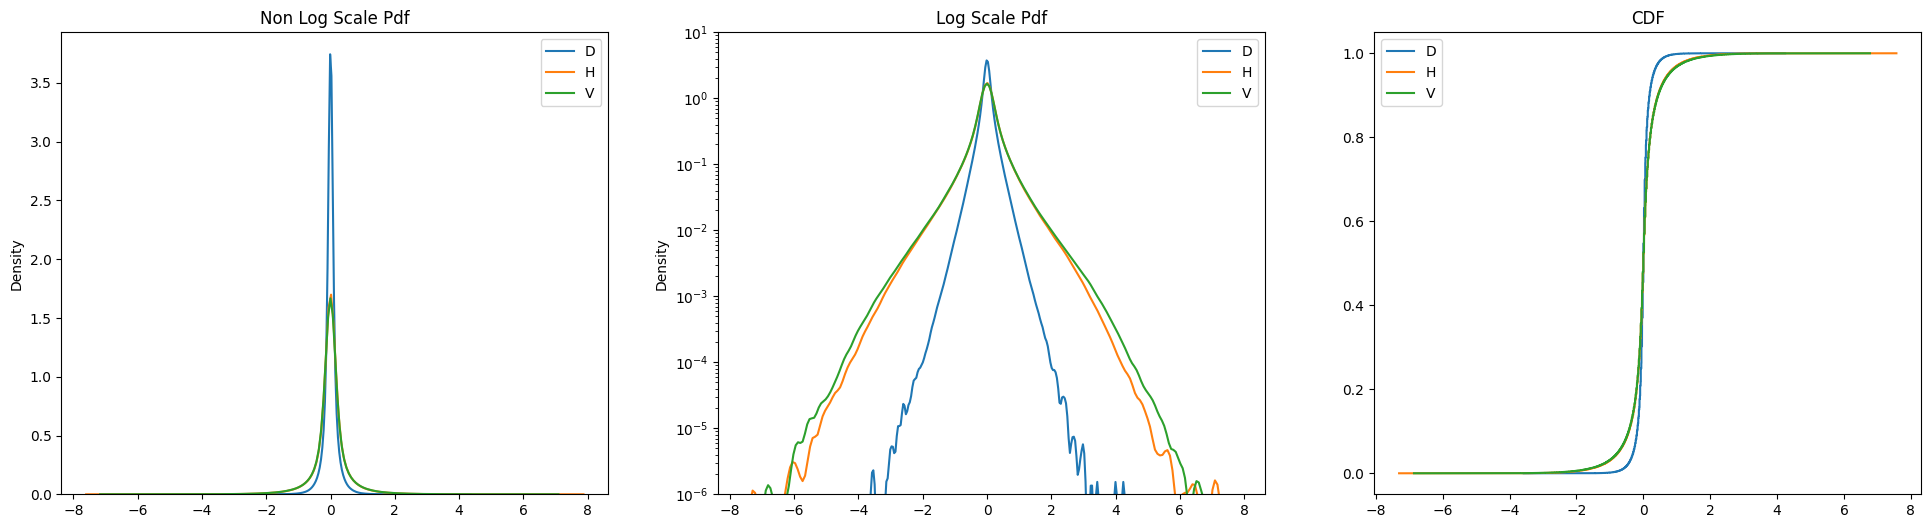

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


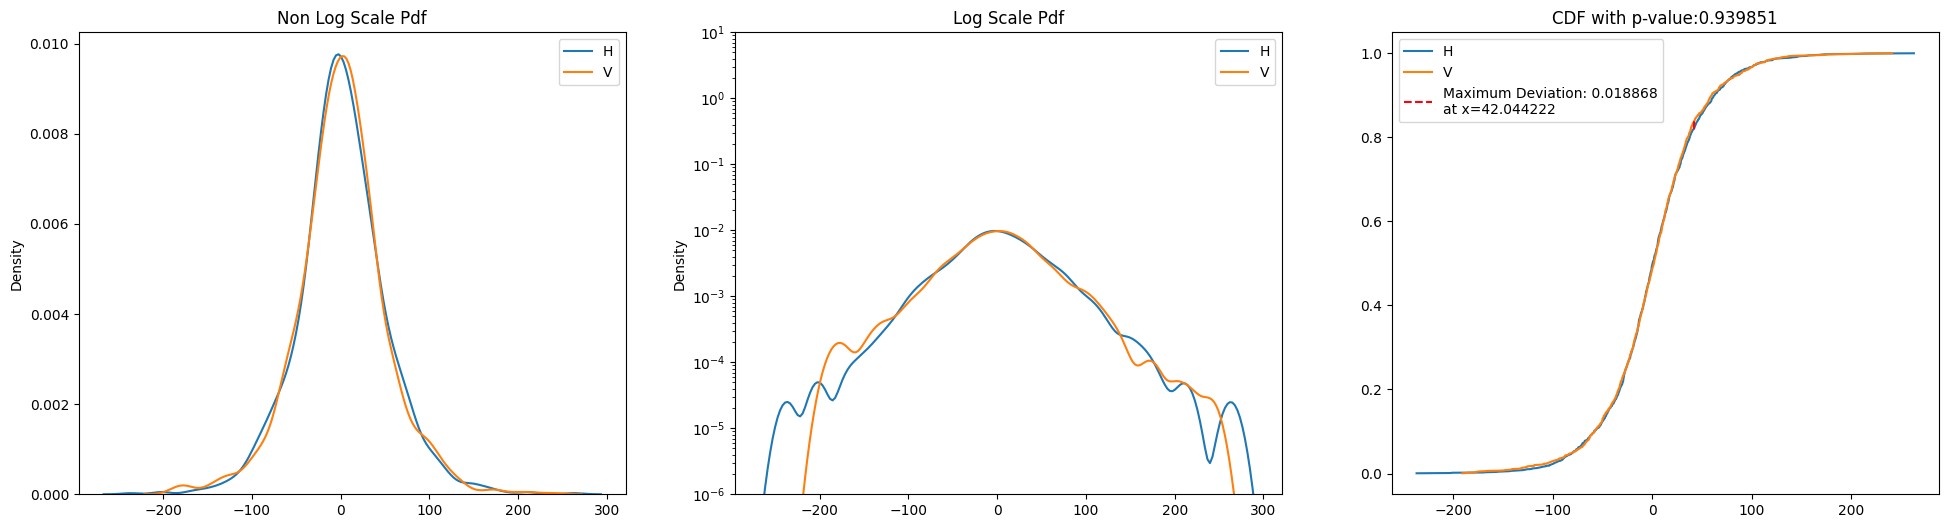

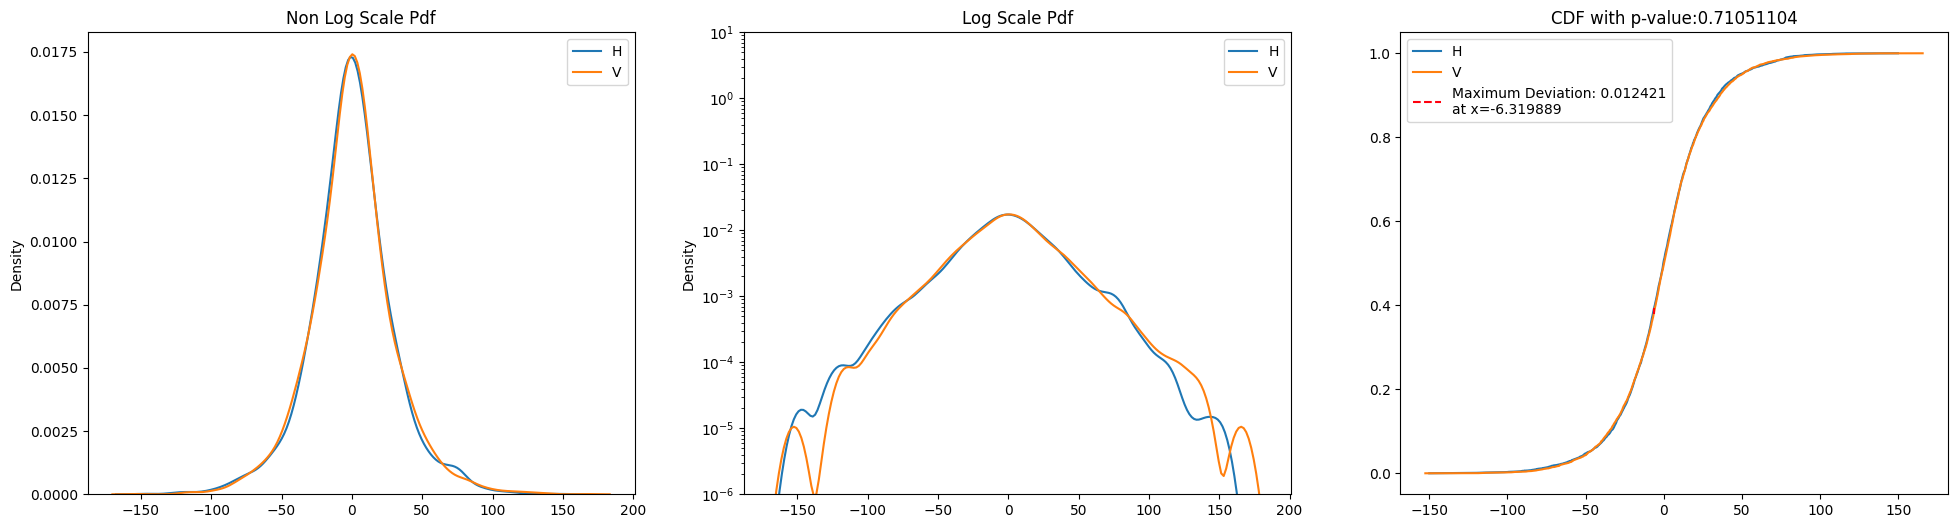

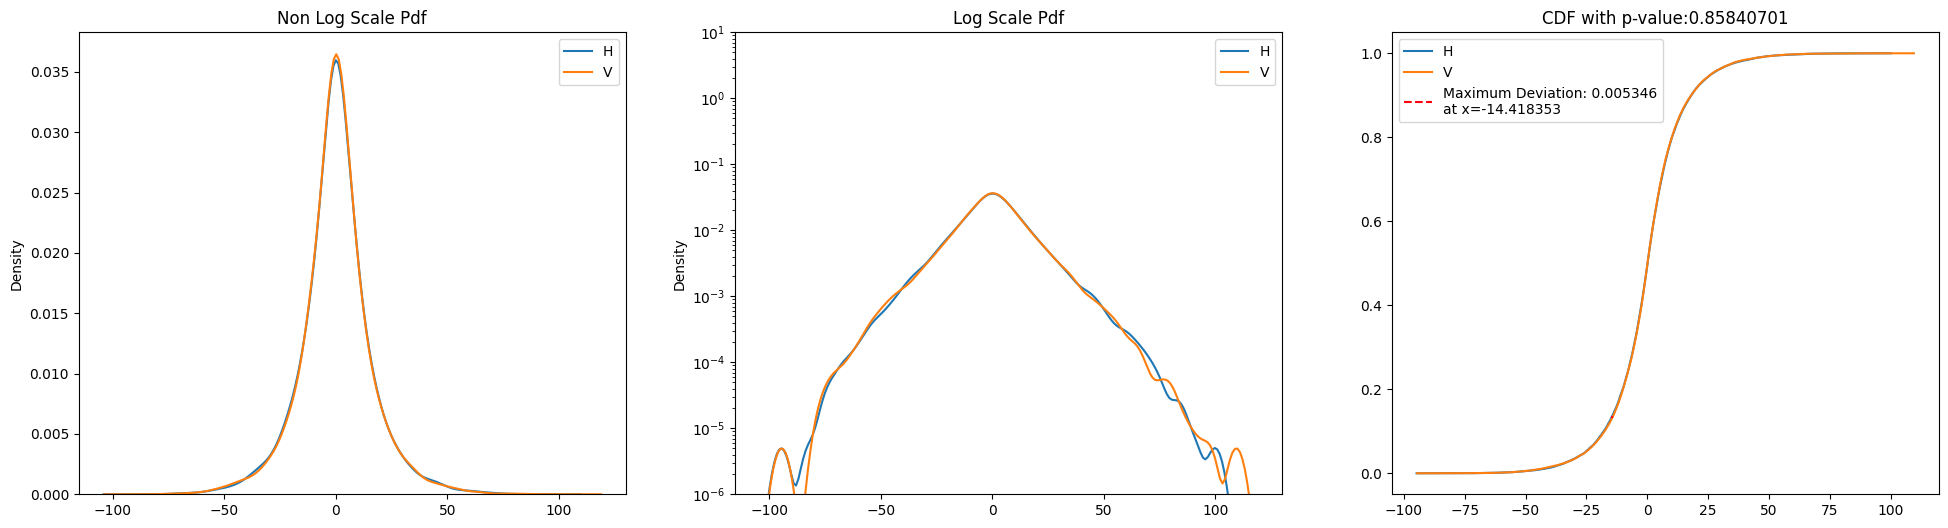

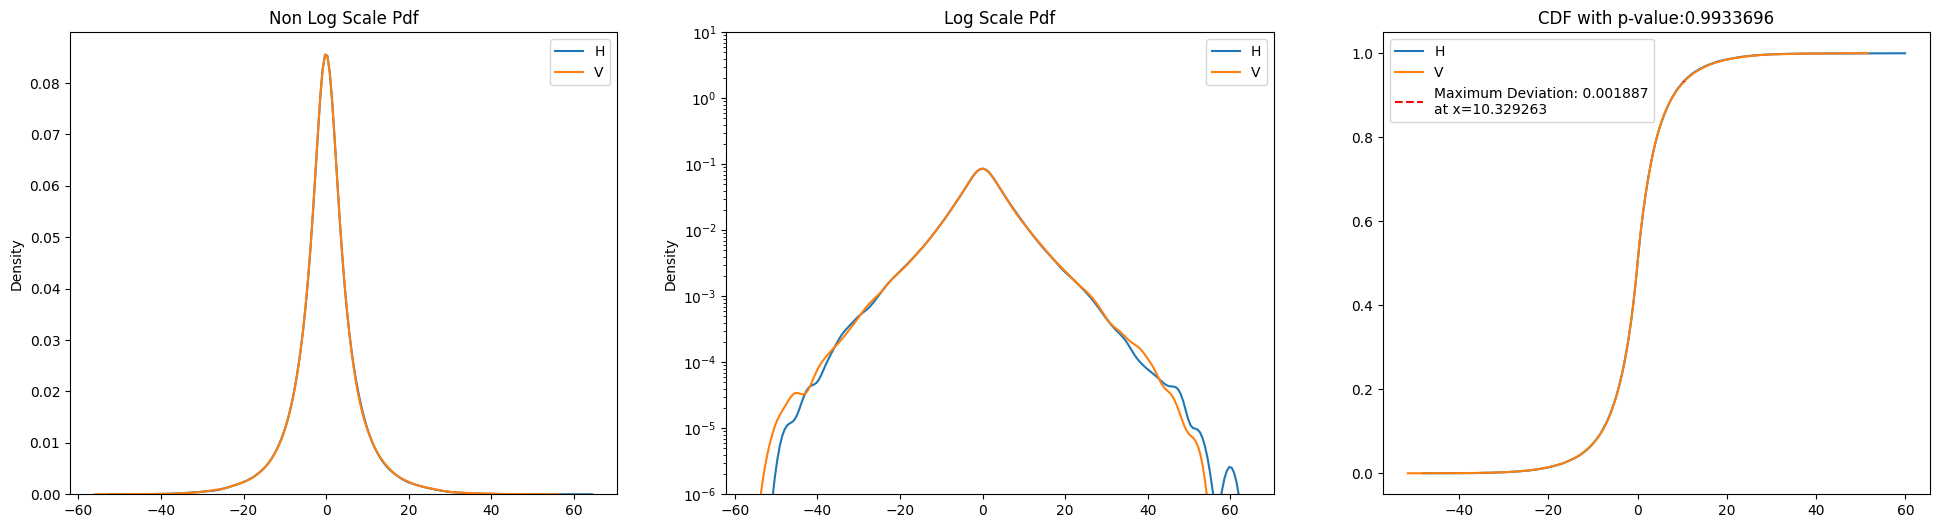

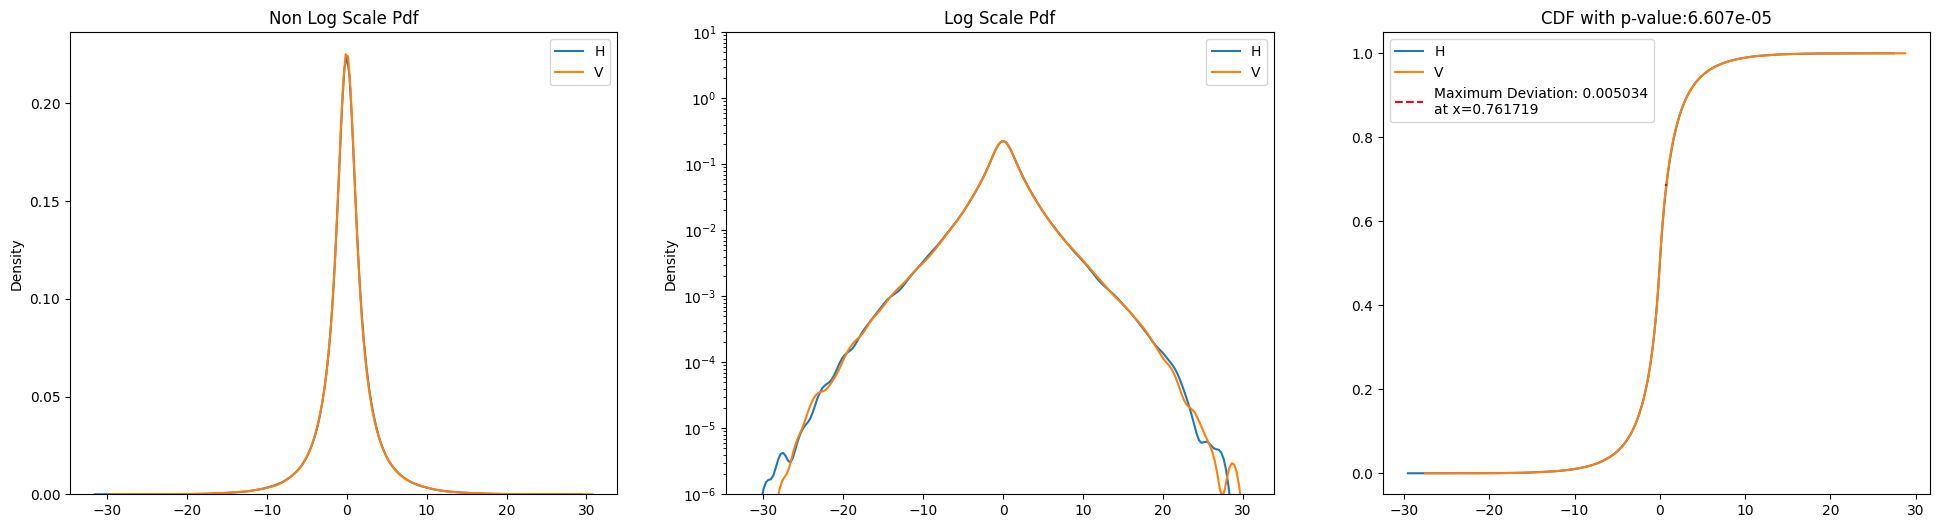

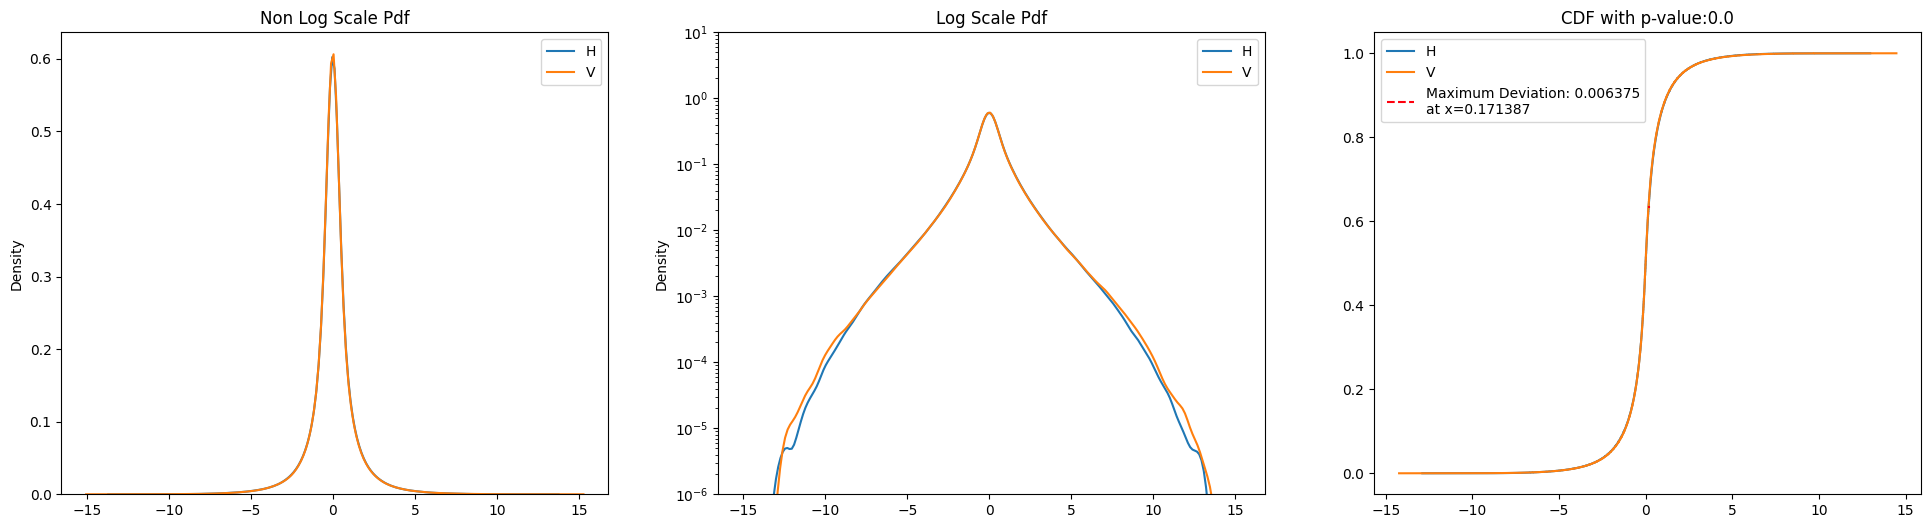

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


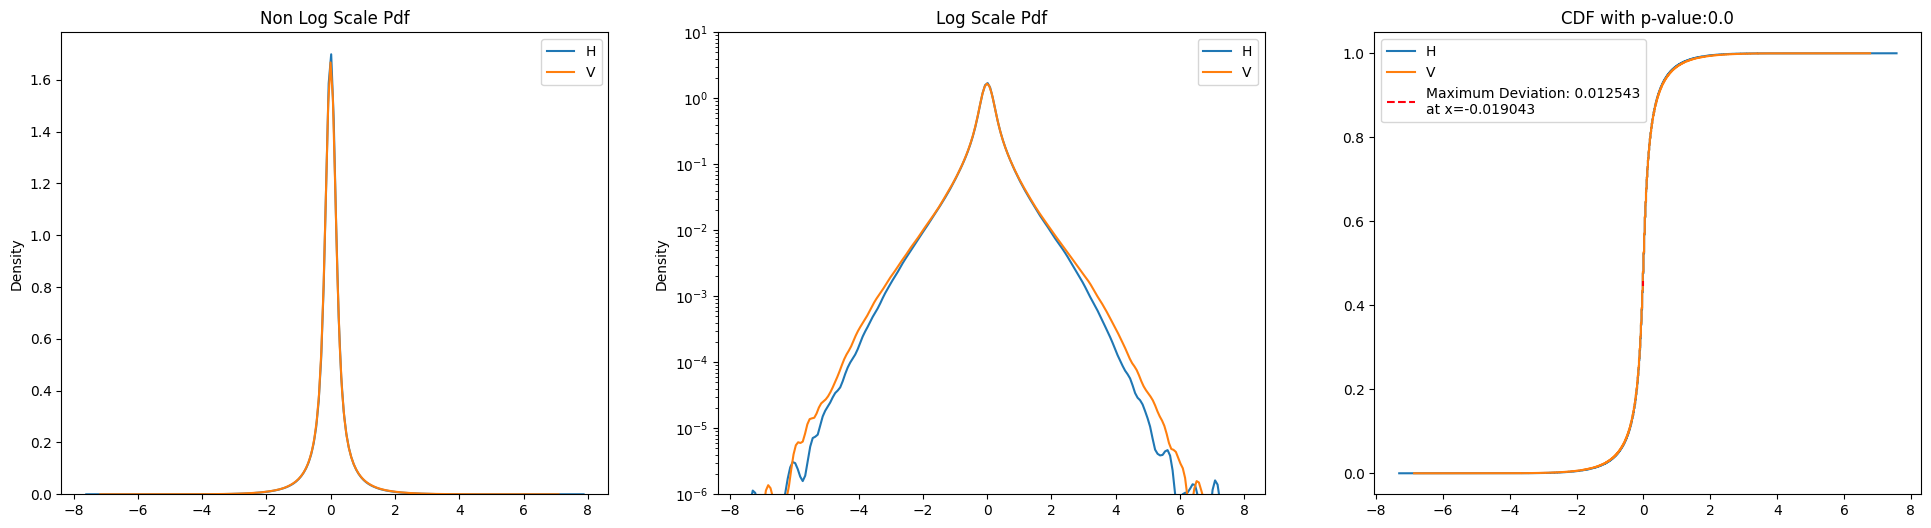

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [ ]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True, image_opener = npz_opener)
gray_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:04<00:00, 395.27it/s]


channel  layer orientation  \
0    gray      1          L1   
1    gray      2           D   
2    gray      2           H   
3    gray      2           V   
4    gray      3           D   

                                                data  
0  [-6.136010676735562, 35.8240861778406, -12.069...  
1  [-20.23138906346379, 5.5501354188873435, 18.58...  
2  [-54.90361916853625, -72.86237043582429, 8.412...  
3  [55.30632696341718, 9.492828886136293, -24.910...  
4  [36.007950387242076, 3.1733897404411224, -9.82...

In [ ]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_71454/1887393883.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.015723   9.894195e-01
1     2     D      V  0.076101   1.992333e-04
0     2     D      H  0.083019   3.450146e-05
2     3     H      V  0.011478   7.962846e-01
1     3     D      V  0.078459   1.913269e-17
0     3     D      H  0.083176   1.483943e-19
2     4     H      V  0.009277   2.222998e-01
1     4     D      V  0.076808   1.032467e-65
0     4     D      H  0.081289   1.457152e-73
2     5     H      V  0.002781   8.251132e-01
1     5     D      V  0.083884  6.633415e-312
0     5     D      H  0.084778  1.363473e-318
2     6     H      V  0.005734   3.069175e-06
1     6     D      V  0.083409   0.000000e+00
0     6     D      H  0.087222   0.000000e+00
2     7     H      V  0.006434   1.059658e-29
1     7     D      V  0.085023   0.000000e+00
0     7     D      H  0.090002   0.000000e+00
2     8     H      V  0.002367   2.861514e-16
1     8     D      V  0.113933   0.000000e+00
0     8     D      H  0.115063   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


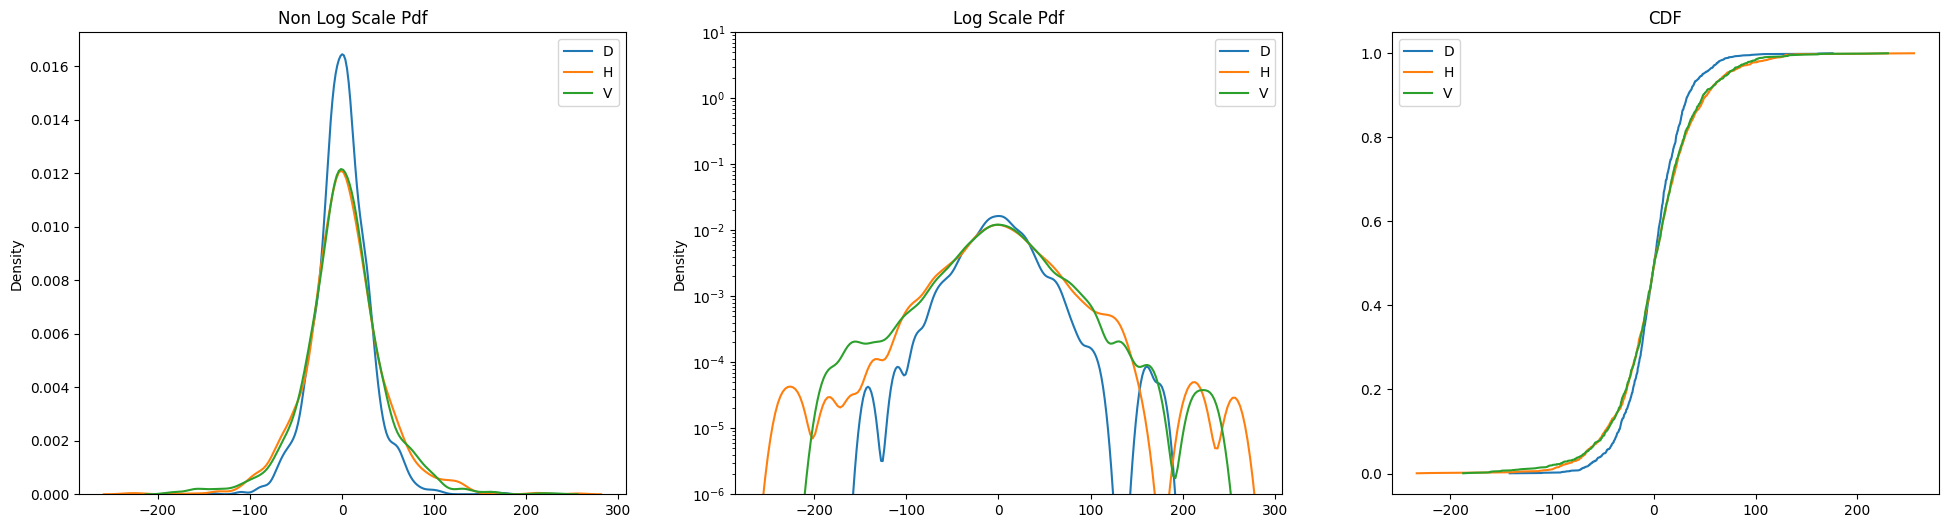

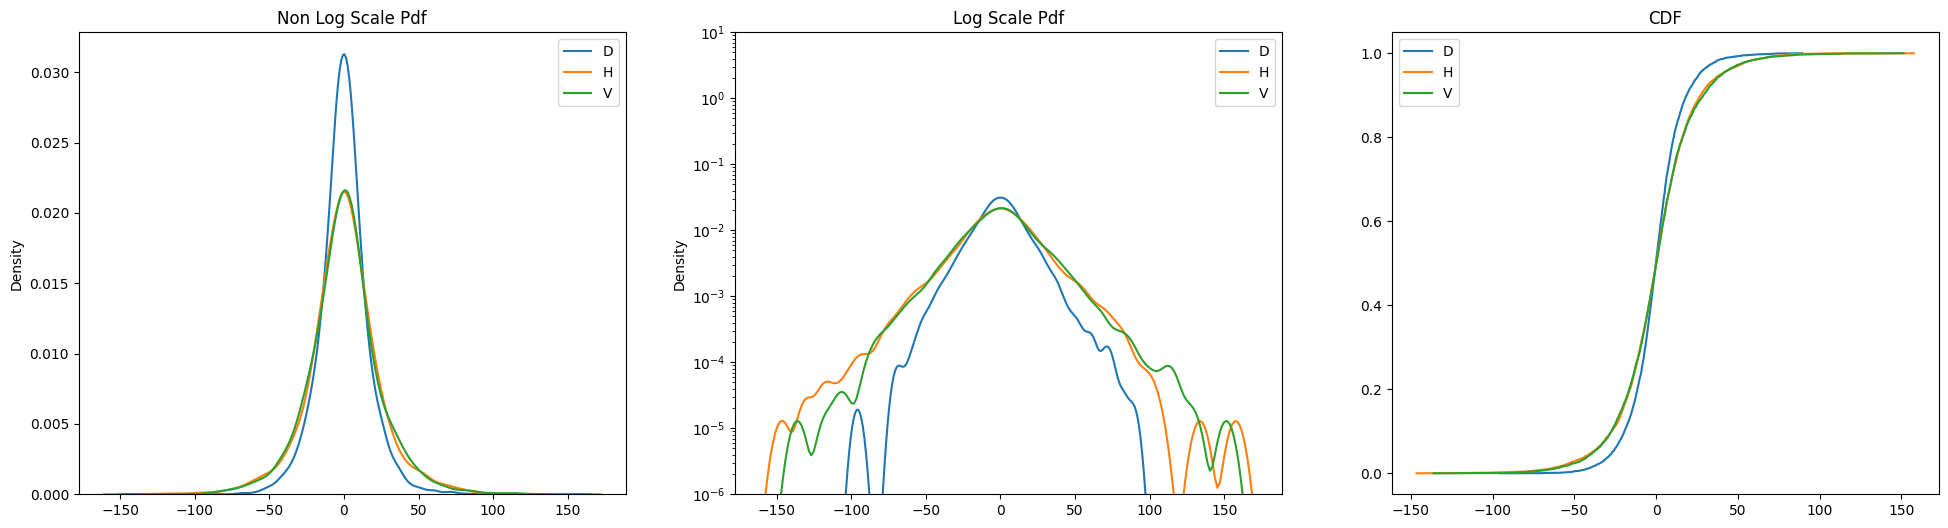

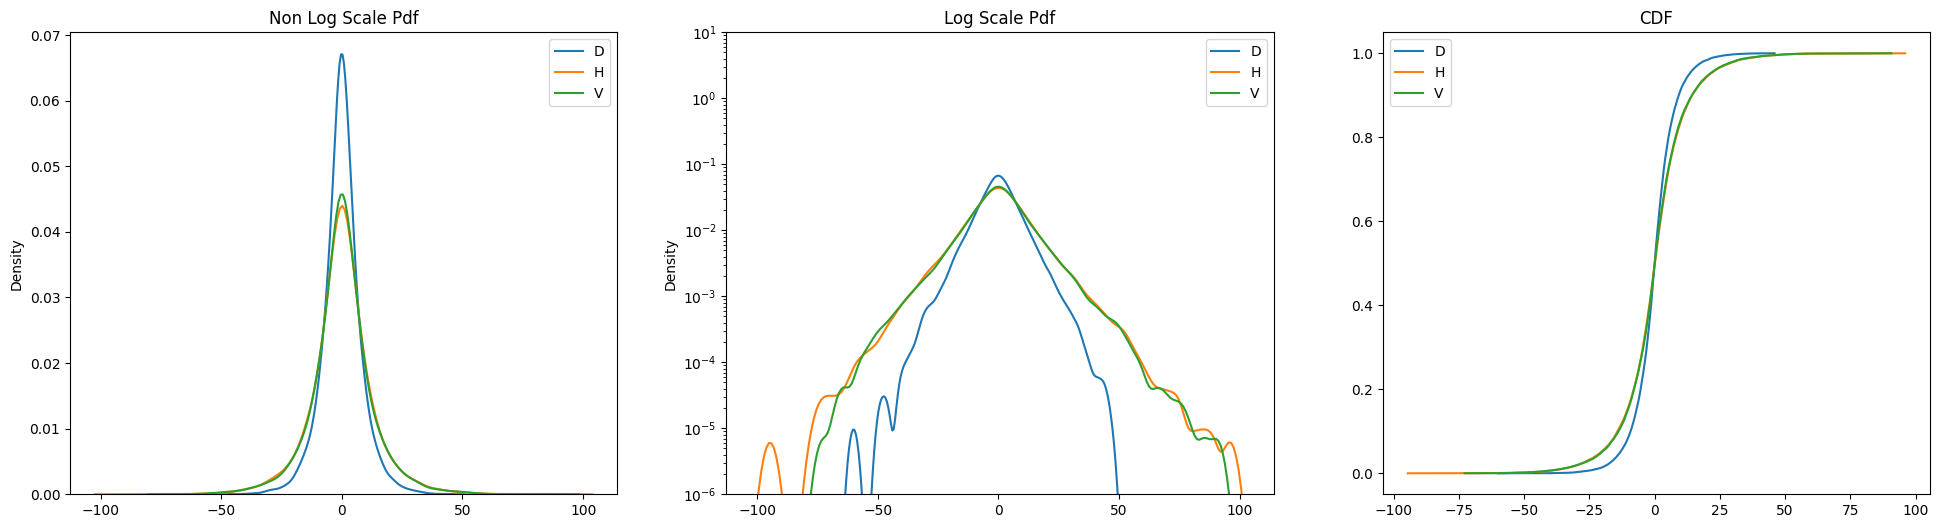

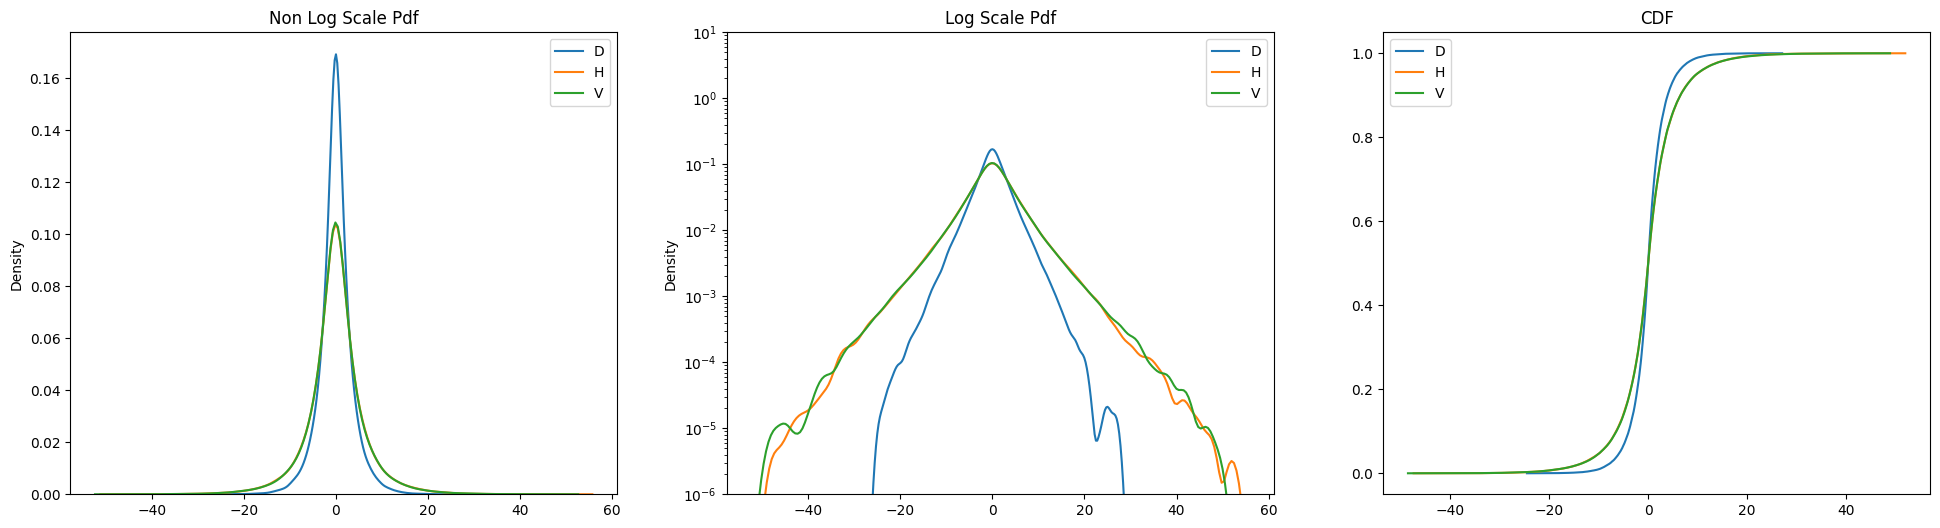

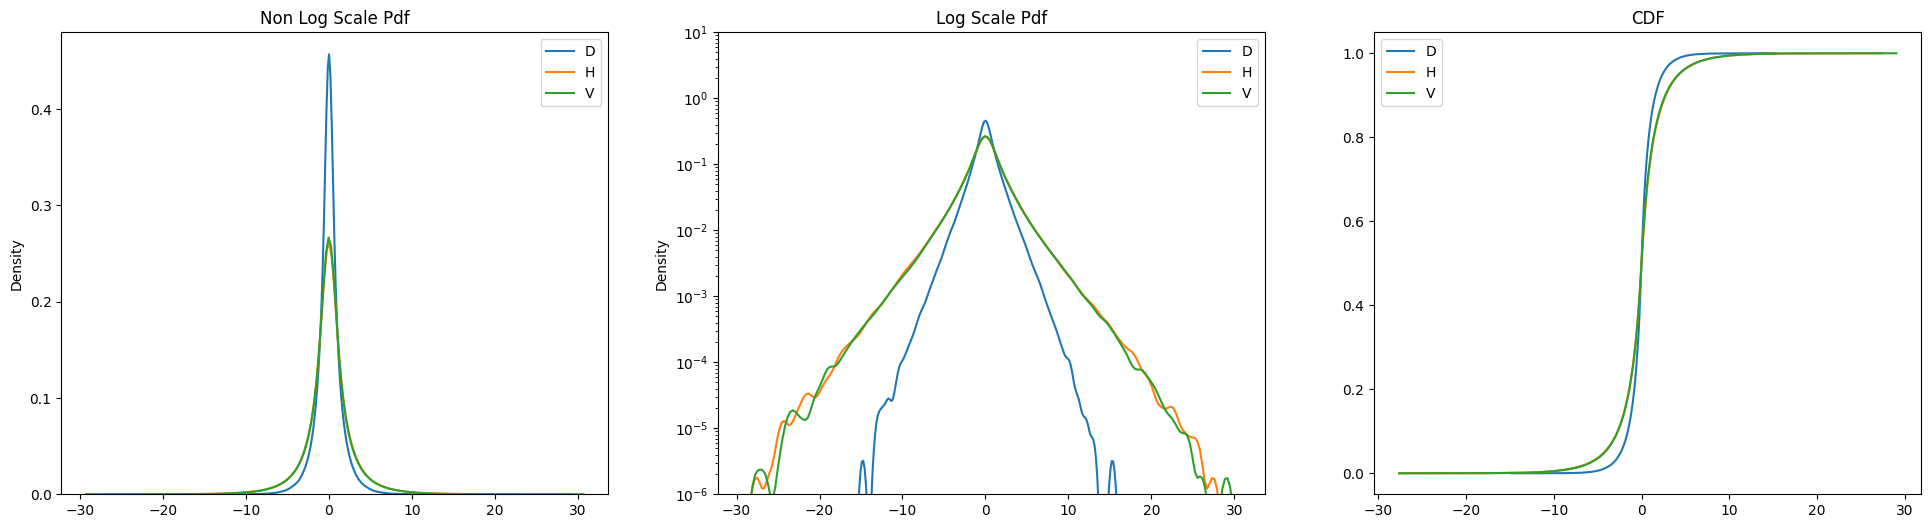

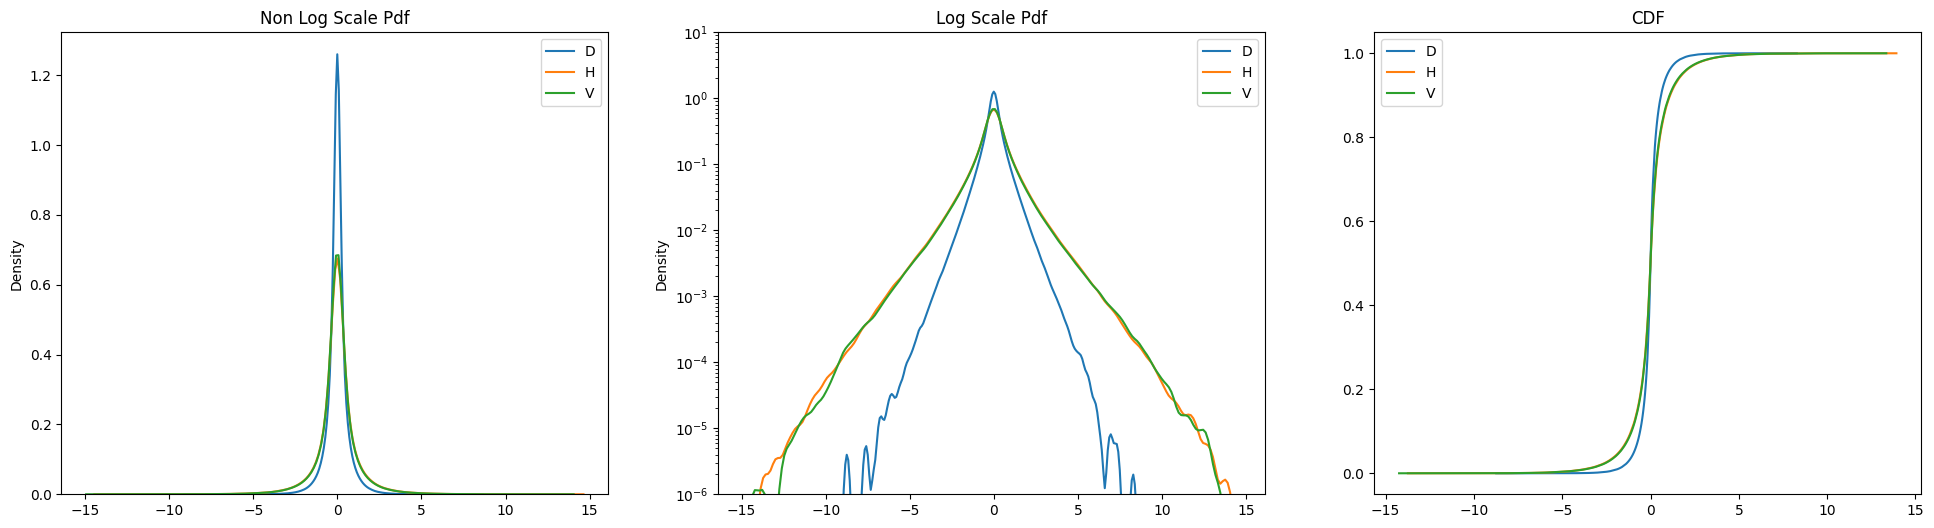

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


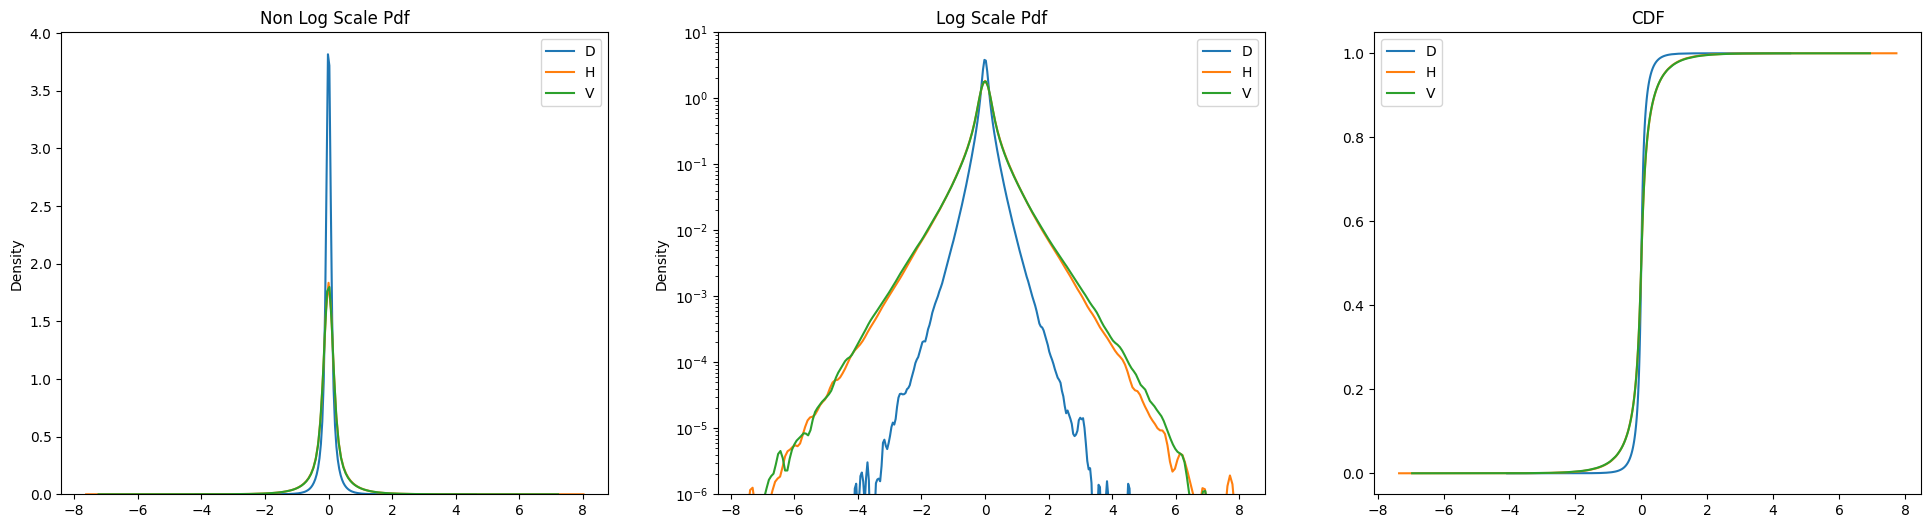

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


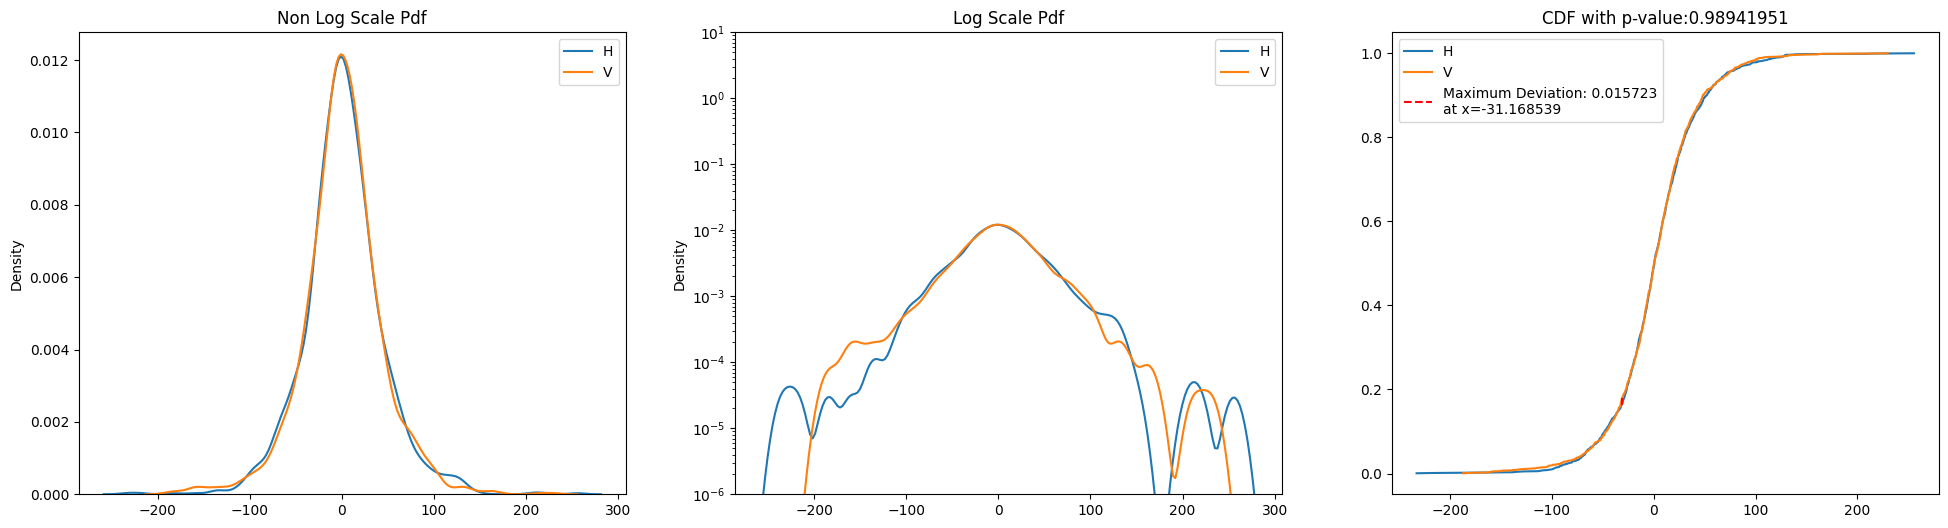

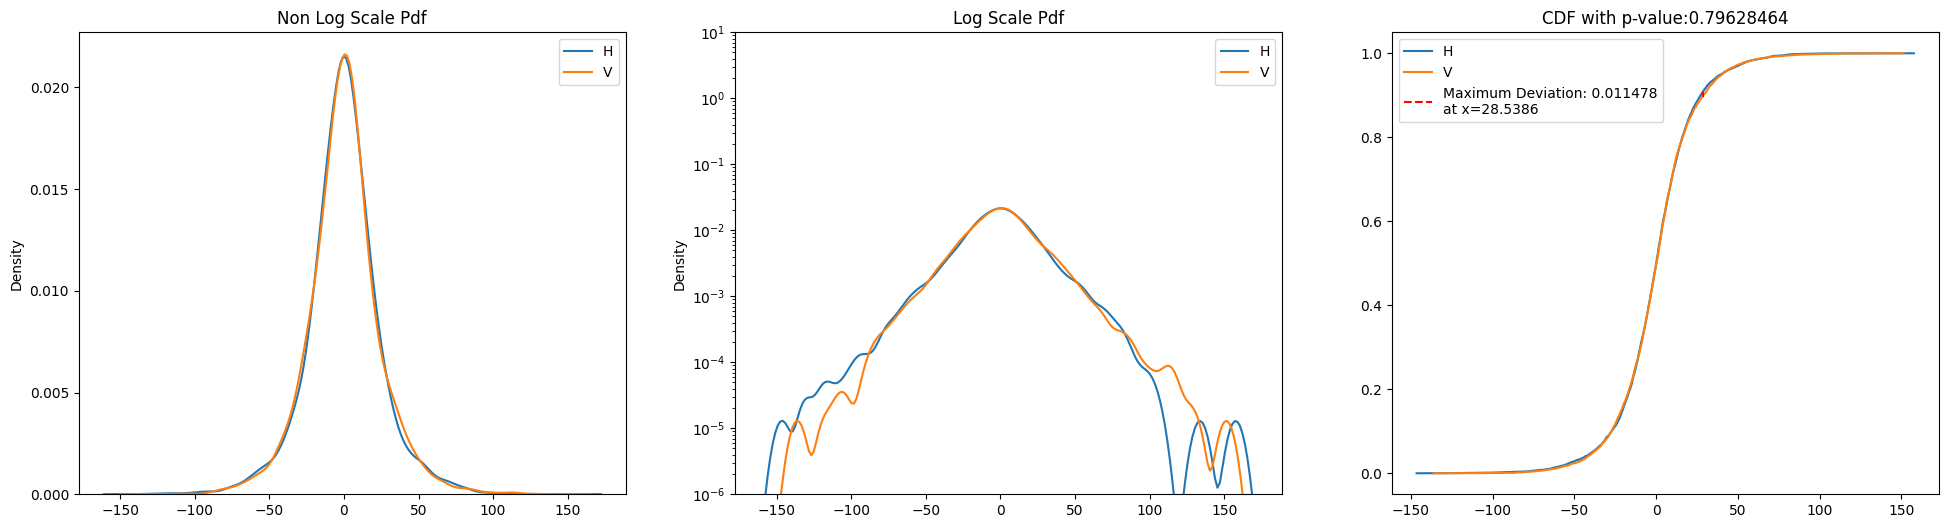

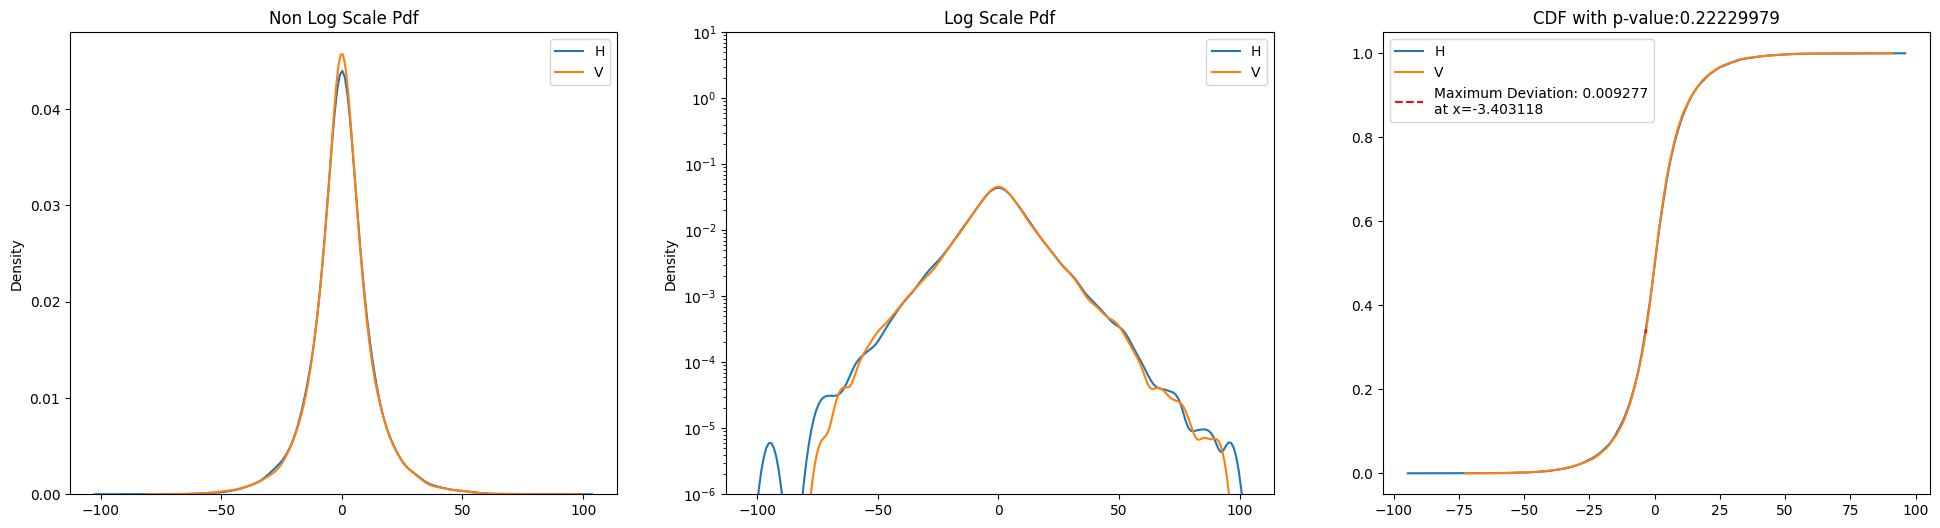

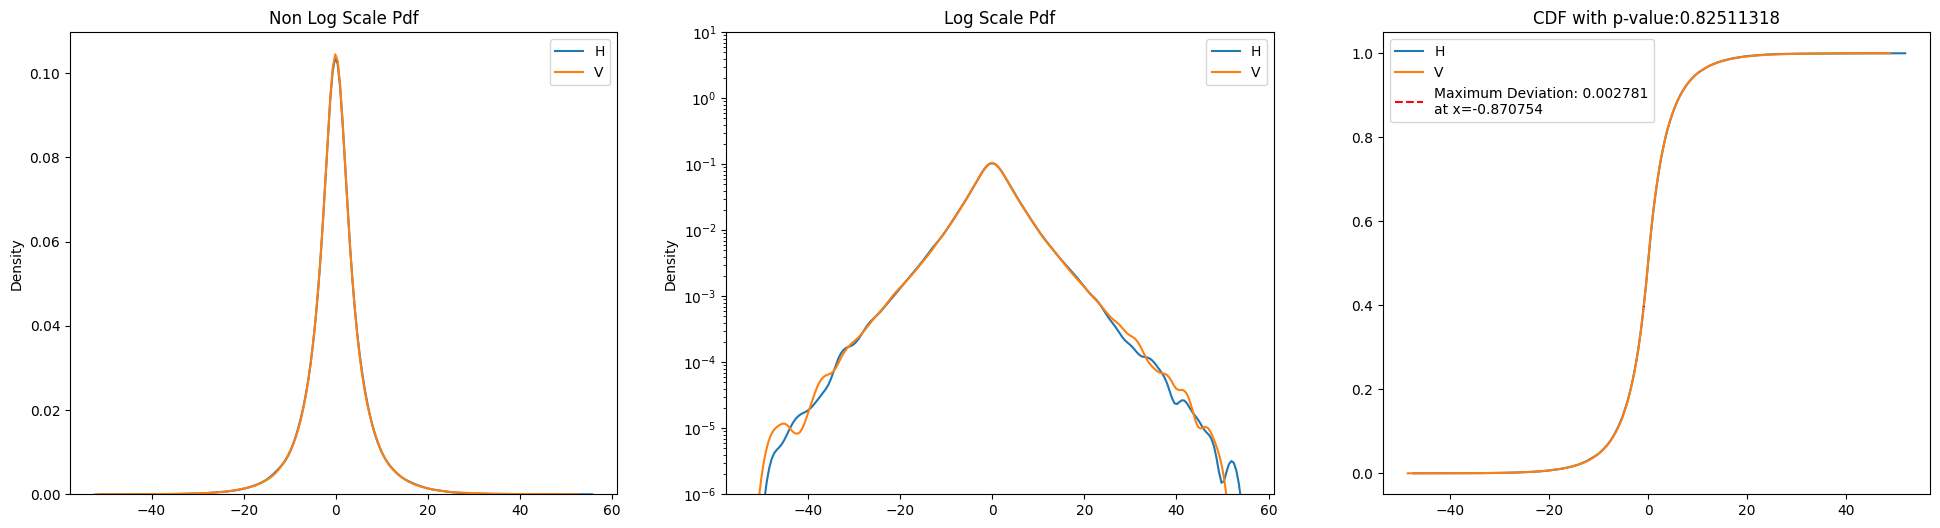

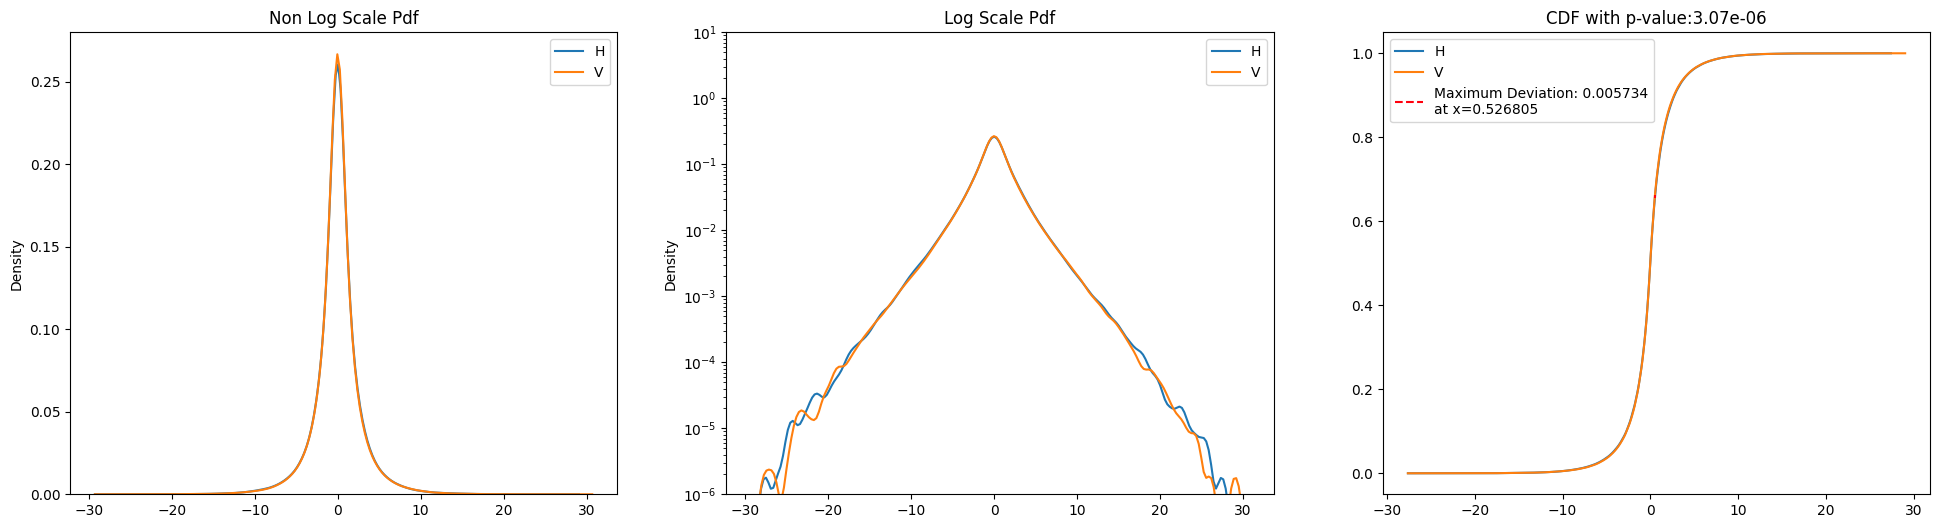

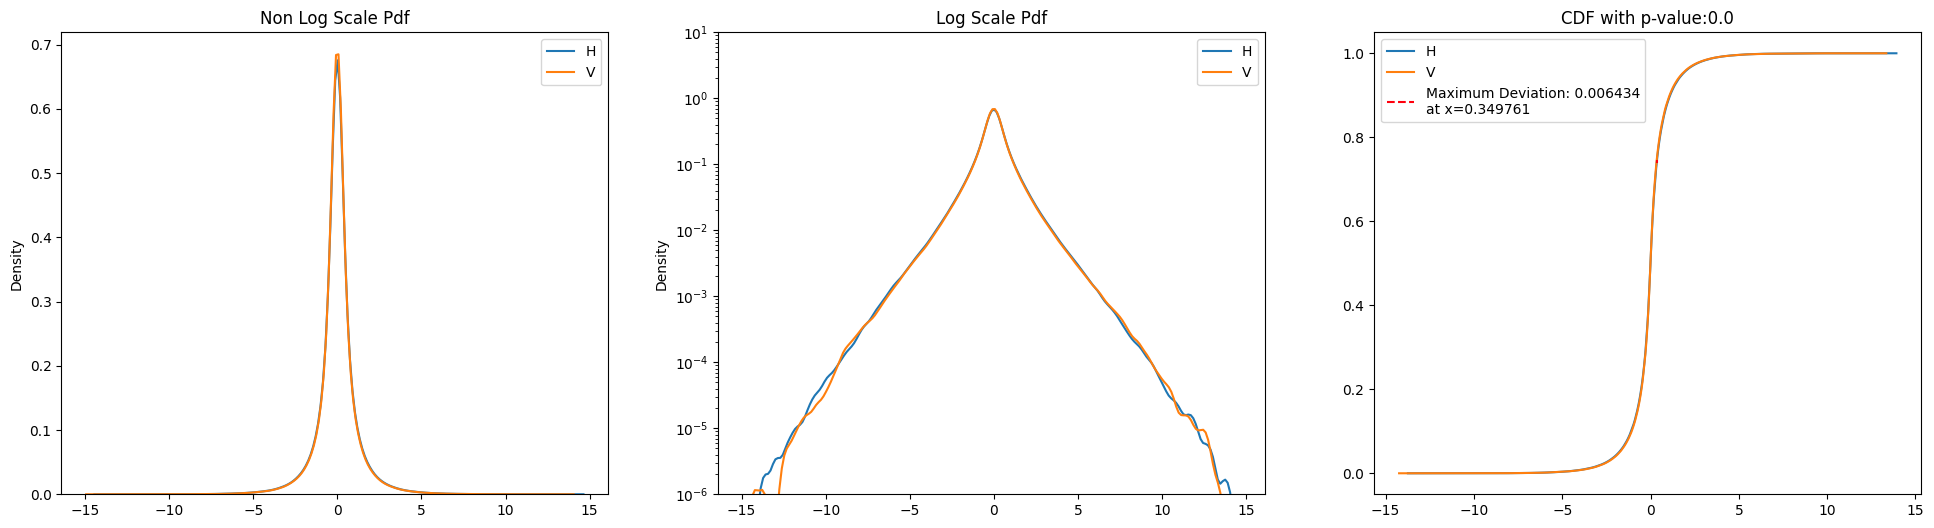

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


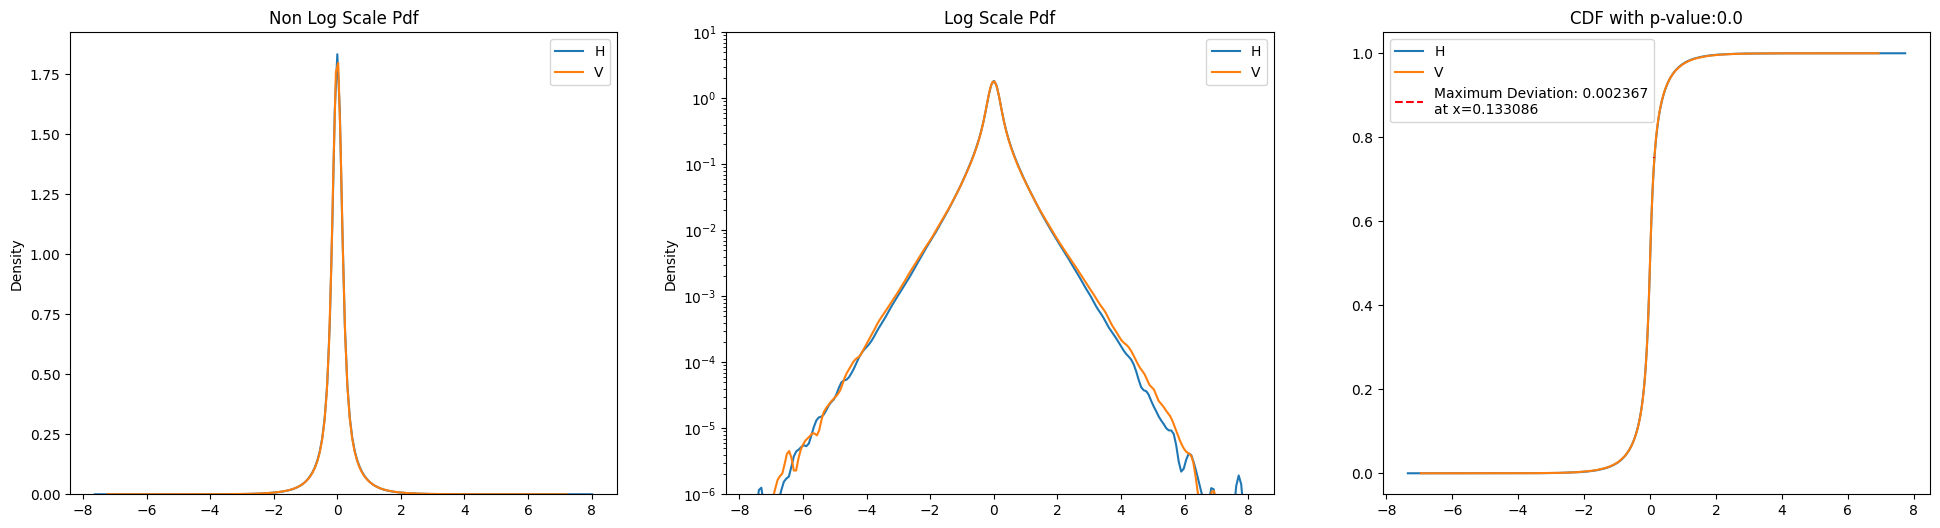

In [ ]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")